In [390]:
!pip install -U pandas
!pip install -U matplotlib
!pip install -U seaborn
!pip install -U plotly==5.22.0
!pip install -U nbformat==4.2.0 

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import numpy as np

In [2]:
raw_client_data = pd.read_csv('./logs/c-data-acc-eval.csv')
raw_server_data = pd.read_csv('./logs/s-data-acc-eval.csv')

/tmp/ipykernel_1535159/3968171857.py:1: DtypeWarning: Columns (0,13,14,15,16,24) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_client_data = pd.read_csv('./logs/c-data.csv')


In [3]:
raw_client_data = raw_client_data.drop(1,axis=0)
# raw_client_data = raw_client_data.drop(index=16383, axis=1)
raw_client_data.head()

rounds   cid strategy select_client_method model_type  g_eval_acc  \
0      1  82.0  r_robin               random        dnn        0.45   
2      1  20.0  r_robin               random        dnn        0.31   
3      1  17.0  r_robin               random        dnn        0.09   
4      1  42.0  r_robin               random        dnn        0.25   
5      1  23.0  r_robin               random        dnn        0.11   

   g_eval_loss  l_eval_acc  l_eval_loss  g_fit_acc  ...  dirichlet_alpha  \
0    88.592003        0.49    84.230469   0.715789  ...              0.1   
2   132.597672        0.27   150.681137   0.853383  ...              0.1   
3   103.885696        0.22    98.336678   0.600368  ...              0.1   
4   147.789719        0.36   137.986481   0.832437  ...              0.1   
5   446.702240        0.11   502.023346   0.919492  ...              0.1   

   non_iid        dataset exploitation exploration least_select_factor  decay  \
0     True  fashion_mnist         0.33         0.1                 0.0  0.005   
2     True  fashion_mnist         0.33         0.1                 0.0  0.005   
3     True  fashion_mnist         0.33         0.1                 0.0  0.005   
4     True  fashion_mnist         0.33         0.1                 0.0  0.005   
5     True  fashion_mnist         0.33         0.1                 0.0  0.005   

   threshold  init_clients       config_test  
0        1.0           0.1  R_ROBIN 10 ic:10  
2        1.0           0.1  R_ROBIN 10 ic:10  
3        1.0           0.1  R_ROBIN 10 ic:10  
4        1.0           0.1  R_ROBIN 10 ic:10  
5        1.0           0.1  R_ROBIN 10 ic:10  

[5 rows x 33 columns]

In [4]:
raw_client_data['g_eval_acc'].dtype

dtype('float64')

## DEBUG

In [5]:
# df = raw_client_data.iloc[16382]
raw_client_data['rounds'] = raw_client_data['rounds'].astype(int)
raw_client_data['config_test'] = raw_client_data['config_test'].astype(str)
raw_client_data['g_eval_acc'] = raw_client_data['g_eval_acc'].astype(np.float128)
# df

KeyboardInterrupt: 

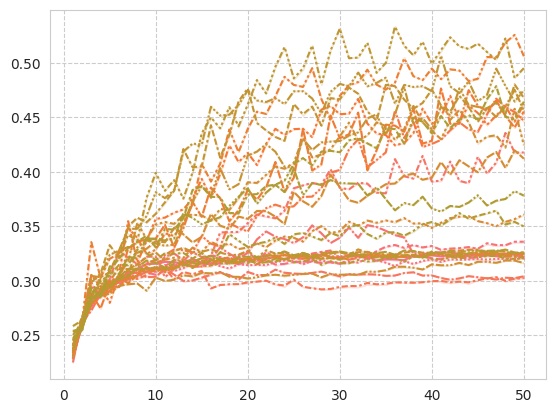

In [235]:
# sns.lineplot(
#     x='rounds',
#     y='g_eval_acc',
#     data=raw_client_data,
#     hue='config_test',
#     style='config_test',
#     errorbar=('ci', False),
# )

<Axes: xlabel='config_test', ylabel='n_engaged'>

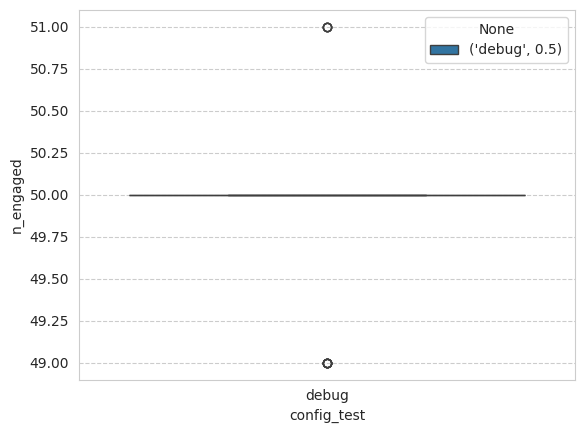

In [ ]:
# sns.boxplot(
#     data=raw_server_data,
#     y='n_engaged',
#     x='config_test',
#     hue=raw_client_data[['config_test', 'init_clients']].apply(tuple, axis=1),
# )

In [6]:
all_labels = raw_client_data['config_test'].unique()
all_labels[:5]

array(['R_ROBIN 10 ic:10', 'R_ROBIN 20 ic:10', 'R_ROBIN 30 ic:10',
       'POC 10 ic:10', 'POC 20 ic:10'], dtype=object)

In [7]:
others = [
    'POC 10 ic:10',
    'POC 10 ic:100',
    'POC 20 ic:10',
    'POC 20 ic:100',
    'POC 30 ic:10',
    'POC 30 ic:100',
    'AVG 10 ic:10',
    'AVG 10 ic:100',
    'AVG 20 ic:10',
    'AVG 20 ic:100',
    'AVG 30 ic:10',
    'AVG 30 ic:100',
    "R_ROBIN 10 ic:10",
    "R_ROBIN 20 ic:10",
    "R_ROBIN 30 ic:10",
    "R_ROBIN 10 ic:20",
    "R_ROBIN 20 ic:20",
    "R_ROBIN 30 ic:20",
    "R_ROBIN 10 ic:30",
    "R_ROBIN 20 ic:30",
    "R_ROBIN 30 ic:30",
    "R_ROBIN 10 ic:40",
    "R_ROBIN 20 ic:40",
    "R_ROBIN 30 ic:40",
    "R_ROBIN 10 ic:50",
    "R_ROBIN 20 ic:50",
    "R_ROBIN 30 ic:50",
    'DEEV 0.01 ic:10',
    'DEEV 0.01 ic:100',
    'DEEV 0.005 ic:10',
    'DEEV 0.005 ic:100',
    'DEEV 0.001 ic:10',
    'DEEV 0.001 ic:100',
    'POC 10 ic:20',
    'POC 20 ic:20',
    'POC 30 ic:20',
    'AVG 10 ic:20',
    'AVG 20 ic:20',
    'AVG 30 ic:20',
    'DEEV 0.01 ic:20',
    'DEEV 0.005 ic:20',
    'DEEV 0.001 ic:20',
    'POC 10 ic:30',
    'POC 20 ic:30',
    'POC 30 ic:30',
    'AVG 10 ic:30',
    'AVG 20 ic:30',
    'AVG 30 ic:30',
    'DEEV 0.01 ic:30',
    'DEEV 0.005 ic:30',
    'DEEV 0.001 ic:30',
    'POC 10 ic:40',
    'POC 20 ic:40',
    'POC 30 ic:40',
    'AVG 10 ic:40',
    'AVG 20 ic:40',
    'AVG 30 ic:40',
    'DEEV 0.01 ic:40',
    'DEEV 0.005 ic:40',
    'DEEV 0.001 ic:40',
    'POC 10 ic:50',
    'POC 20 ic:50',
    'POC 30 ic:50',
    'AVG 10 ic:50',
    'AVG 20 ic:50',
    'AVG 30 ic:50',
    'DEEV 0.01 ic:50',
    'DEEV 0.005 ic:50',
    'DEEV 0.001 ic:50',
]

In [8]:
labels = ['poc', 'avg', 'deev', 'cia', 'r_robin']
c = plt.cm.inferno(np.linspace(0,0.8, len(labels)))
colors = dict(zip(labels, c))
colors

{'poc': array([1.4620e-03, 4.6600e-04, 1.3866e-02, 1.0000e+00]),
 'avg': array([0.258234, 0.038571, 0.406485, 1.      ]),
 'deev': array([0.578304, 0.148039, 0.404411, 1.      ]),
 'cia': array([0.865006, 0.316822, 0.226055, 1.      ]),
 'r_robin': array([0.987622, 0.64532 , 0.039886, 1.      ])}

In [9]:
others_palette = {
    "R_ROBIN 10 ic:10": colors['r_robin'],
    "R_ROBIN 20 ic:10": colors['r_robin'],
    "R_ROBIN 30 ic:10": colors['r_robin'],
    "R_ROBIN 10 ic:20": colors['r_robin'],
    "R_ROBIN 20 ic:20": colors['r_robin'],
    "R_ROBIN 30 ic:20": colors['r_robin'],
    "R_ROBIN 10 ic:30": colors['r_robin'],
    "R_ROBIN 20 ic:30": colors['r_robin'],
    "R_ROBIN 30 ic:30": colors['r_robin'],
    "R_ROBIN 10 ic:40": colors['r_robin'],
    "R_ROBIN 20 ic:40": colors['r_robin'],
    "R_ROBIN 30 ic:40": colors['r_robin'],
    "R_ROBIN 10 ic:50": colors['r_robin'],
    "R_ROBIN 20 ic:50": colors['r_robin'],
    "R_ROBIN 30 ic:50": colors['r_robin'],
    "POC 10 ic:10": colors['poc'],
    "POC 10 ic:100": colors['poc'],
    "POC 20 ic:10": colors['poc'],
    "POC 20 ic:100": colors['poc'],
    "POC 30 ic:10": colors['poc'],
    "POC 30 ic:100": colors['poc'],
    "AVG 10 ic:10": colors['avg'],
    "AVG 10 ic:100": colors['avg'],
    "AVG 20 ic:10": colors['avg'],
    "AVG 20 ic:100": colors['avg'],
    "AVG 30 ic:10": colors['avg'],
    "AVG 30 ic:100": colors['avg'],
    "DEEV 0.01 ic:10": colors['deev'],
    "DEEV 0.01 ic:100": colors['deev'],
    "DEEV 0.005 ic:10": colors['deev'],
    "DEEV 0.005 ic:100": colors['deev'],
    "DEEV 0.001 ic:10": colors['deev'],
    "DEEV 0.001 ic:100": colors['deev'],
    "POC 10 ic:20": colors['poc'],
    "POC 20 ic:20": colors['poc'],
    "POC 30 ic:20": colors['poc'],
    "AVG 10 ic:20": colors['avg'],
    "AVG 20 ic:20": colors['avg'],
    "AVG 30 ic:20": colors['avg'],
    "DEEV 0.01 ic:20": colors['deev'],
    "DEEV 0.005 ic:20": colors['deev'],
    "DEEV 0.001 ic:20": colors['deev'],
    "POC 10 ic:30": colors['poc'],
    "POC 20 ic:30": colors['poc'],
    "POC 30 ic:30": colors['poc'],
    "AVG 10 ic:30": colors['avg'],
    "AVG 20 ic:30": colors['avg'],
    "AVG 30 ic:30": colors['avg'],
    "DEEV 0.01 ic:30": colors['deev'],
    "DEEV 0.005 ic:30": colors['deev'],
    "DEEV 0.001 ic:30": colors['deev'],
    "POC 10 ic:40": colors['poc'],
    "POC 20 ic:40": colors['poc'],
    "POC 30 ic:40": colors['poc'],
    "AVG 10 ic:40": colors['avg'],
    "AVG 20 ic:40": colors['avg'],
    "AVG 30 ic:40": colors['avg'],
    "DEEV 0.01 ic:40": colors['deev'],
    "DEEV 0.005 ic:40": colors['deev'],
    "DEEV 0.001 ic:40": colors['deev'],
    "POC 10 ic:50": colors['poc'],
    "POC 20 ic:50": colors['poc'],
    "POC 30 ic:50": colors['poc'],
    "AVG 10 ic:50": colors['avg'],
    "AVG 20 ic:50": colors['avg'],
    "AVG 30 ic:50": colors['avg'],
    "DEEV 0.01 ic:50": colors['deev'],
    "DEEV 0.005 ic:50": colors['deev'],
    "DEEV 0.001 ic:50": colors['deev'],
    "FedCIA POC random ic:10 expl:25": colors['cia'],
    "FedCIA POC random ic:20 expl:25": colors['cia'],
    "FedCIA POC random ic:30 expl:25": colors['cia'],
    "FedCIA POC random ic:40 expl:25": colors['cia'],
    "FedCIA POC random ic:50 expl:25": colors['cia'],
    "FedCIA POC DEEV ic:10 expl:25": colors['cia'],
    "FedCIA POC DEEV ic:20 expl:25": colors['cia'],
    "FedCIA POC DEEV ic:30 expl:25": colors['cia'],
    "FedCIA POC DEEV ic:40 expl:25": colors['cia'],
    "FedCIA POC DEEV ic:50 expl:25": colors['cia'],
    "FedCIA POC R_ROBIN ic:10 expl:25": colors['cia'],
    "FedCIA POC R_ROBIN ic:20 expl:25": colors['cia'],
    "FedCIA POC R_ROBIN ic:30 expl:25": colors['cia'],
    "FedCIA POC R_ROBIN ic:40 expl:25": colors['cia'],
    "FedCIA POC R_ROBIN ic:50 expl:25": colors['cia'],
    "FedCIA POC random ic:10 expl:50": colors['cia'],
    "FedCIA POC random ic:20 expl:50": colors['cia'],
    "FedCIA POC random ic:30 expl:50": colors['cia'],
    "FedCIA POC random ic:40 expl:50": colors['cia'],
    "FedCIA POC random ic:50 expl:50": colors['cia'],
    "FedCIA POC DEEV ic:10 expl:50": colors['cia'],
    "FedCIA POC DEEV ic:20 expl:50": colors['cia'],
    "FedCIA POC DEEV ic:30 expl:50": colors['cia'],
    "FedCIA POC DEEV ic:40 expl:50": colors['cia'],
    "FedCIA POC DEEV ic:50 expl:50": colors['cia'],
    "FedCIA POC R_ROBIN ic:10 expl:50": colors['cia'],
    "FedCIA POC R_ROBIN ic:20 expl:50": colors['cia'],
    "FedCIA POC R_ROBIN ic:30 expl:50": colors['cia'],
    "FedCIA POC R_ROBIN ic:40 expl:50": colors['cia'],
    "FedCIA POC R_ROBIN ic:50 expl:50": colors['cia'],
    "FedCIA POC random ic:10 expl:75": colors['cia'],
    "FedCIA POC random ic:20 expl:75": colors['cia'],
    "FedCIA POC random ic:30 expl:75": colors['cia'],
    "FedCIA POC random ic:40 expl:75": colors['cia'],
    "FedCIA POC random ic:50 expl:75": colors['cia'],
    "FedCIA POC DEEV ic:10 expl:75": colors['cia'],
    "FedCIA POC DEEV ic:20 expl:75": colors['cia'],
    "FedCIA POC DEEV ic:30 expl:75": colors['cia'],
    "FedCIA POC DEEV ic:40 expl:75": colors['cia'],
    "FedCIA POC DEEV ic:50 expl:75": colors['cia'],
    "FedCIA POC R_ROBIN ic:10 expl:75": colors['cia'],
    "FedCIA POC R_ROBIN ic:20 expl:75": colors['cia'],
    "FedCIA POC R_ROBIN ic:30 expl:75": colors['cia'],
    "FedCIA POC R_ROBIN ic:40 expl:75": colors['cia'],
    "FedCIA POC R_ROBIN ic:50 expl:75": colors['cia'],
    "FedCIA RANDOM random ic:10 expl:25": colors['cia'],
    "FedCIA RANDOM random ic:20 expl:25": colors['cia'],
    "FedCIA RANDOM random ic:30 expl:25": colors['cia'],
    "FedCIA RANDOM random ic:40 expl:25": colors['cia'],
    "FedCIA RANDOM random ic:50 expl:25": colors['cia'],
    "FedCIA RANDOM DEEV ic:10 expl:25": colors['cia'],
    "FedCIA RANDOM DEEV ic:20 expl:25": colors['cia'],
    "FedCIA RANDOM DEEV ic:30 expl:25": colors['cia'],
    "FedCIA RANDOM DEEV ic:40 expl:25": colors['cia'],
    "FedCIA RANDOM DEEV ic:50 expl:25": colors['cia'],
    "FedCIA RANDOM R_ROBIN ic:10 expl:25": colors['cia'],
    "FedCIA RANDOM R_ROBIN ic:20 expl:25": colors['cia'],
    "FedCIA RANDOM R_ROBIN ic:30 expl:25": colors['cia'],
    "FedCIA RANDOM R_ROBIN ic:40 expl:25": colors['cia'],
    "FedCIA RANDOM R_ROBIN ic:50 expl:25": colors['cia'],
    "FedCIA RANDOM random ic:10 expl:50": colors['cia'],
    "FedCIA RANDOM random ic:20 expl:50": colors['cia'],
    "FedCIA RANDOM random ic:30 expl:50": colors['cia'],
    "FedCIA RANDOM random ic:40 expl:50": colors['cia'],
    "FedCIA RANDOM random ic:50 expl:50": colors['cia'],
    "FedCIA RANDOM DEEV ic:10 expl:50": colors['cia'],
    "FedCIA RANDOM DEEV ic:20 expl:50": colors['cia'],
    "FedCIA RANDOM DEEV ic:30 expl:50": colors['cia'],
    "FedCIA RANDOM DEEV ic:40 expl:50": colors['cia'],
    "FedCIA RANDOM DEEV ic:50 expl:50": colors['cia'],
    "FedCIA RANDOM R_ROBIN ic:10 expl:50": colors['cia'],
    "FedCIA RANDOM R_ROBIN ic:20 expl:50": colors['cia'],
    "FedCIA RANDOM R_ROBIN ic:30 expl:50": colors['cia'],
    "FedCIA RANDOM R_ROBIN ic:40 expl:50": colors['cia'],
    "FedCIA RANDOM R_ROBIN ic:50 expl:50": colors['cia'],
    "FedCIA RANDOM random ic:10 expl:75": colors['cia'],
    "FedCIA RANDOM random ic:20 expl:75": colors['cia'],
    "FedCIA RANDOM random ic:30 expl:75": colors['cia'],
    "FedCIA RANDOM random ic:40 expl:75": colors['cia'],
    "FedCIA RANDOM random ic:50 expl:75": colors['cia'],
    "FedCIA RANDOM DEEV ic:10 expl:75": colors['cia'],
    "FedCIA RANDOM DEEV ic:20 expl:75": colors['cia'],
    "FedCIA RANDOM DEEV ic:30 expl:75": colors['cia'],
    "FedCIA RANDOM DEEV ic:40 expl:75": colors['cia'],
    "FedCIA RANDOM DEEV ic:50 expl:75": colors['cia'],
    "FedCIA RANDOM R_ROBIN ic:10 expl:75": colors['cia'],
    "FedCIA RANDOM R_ROBIN ic:20 expl:75": colors['cia'],
    "FedCIA RANDOM R_ROBIN ic:30 expl:75": colors['cia'],
    "FedCIA RANDOM R_ROBIN ic:40 expl:75": colors['cia'],
    "FedCIA RANDOM R_ROBIN ic:50 expl:75": colors['cia'],
    "FedCIA DEEV random ic:10 expl:25": colors['cia'],
    "FedCIA DEEV random ic:20 expl:25": colors['cia'],
    "FedCIA DEEV random ic:30 expl:25": colors['cia'],
    "FedCIA DEEV random ic:40 expl:25": colors['cia'],
    "FedCIA DEEV random ic:50 expl:25": colors['cia'],
    "FedCIA DEEV DEEV ic:10 expl:25": colors['cia'],
    "FedCIA DEEV DEEV ic:20 expl:25": colors['cia'],
    "FedCIA DEEV DEEV ic:30 expl:25": colors['cia'],
    "FedCIA DEEV DEEV ic:40 expl:25": colors['cia'],
    "FedCIA DEEV DEEV ic:50 expl:25": colors['cia'],
    "FedCIA DEEV R_ROBIN ic:10 expl:25": colors['cia'],
    "FedCIA DEEV R_ROBIN ic:20 expl:25": colors['cia'],
    "FedCIA DEEV R_ROBIN ic:30 expl:25": colors['cia'],
    "FedCIA DEEV R_ROBIN ic:40 expl:25": colors['cia'],
    "FedCIA DEEV R_ROBIN ic:50 expl:25": colors['cia'],
    "FedCIA DEEV random ic:10 expl:50": colors['cia'],
    "FedCIA DEEV random ic:20 expl:50": colors['cia'],
    "FedCIA DEEV random ic:30 expl:50": colors['cia'],
    "FedCIA DEEV random ic:40 expl:50": colors['cia'],
    "FedCIA DEEV random ic:50 expl:50": colors['cia'],
    "FedCIA DEEV DEEV ic:10 expl:50": colors['cia'],
    "FedCIA DEEV DEEV ic:20 expl:50": colors['cia'],
    "FedCIA DEEV DEEV ic:30 expl:50": colors['cia'],
    "FedCIA DEEV DEEV ic:40 expl:50": colors['cia'],
    "FedCIA DEEV DEEV ic:50 expl:50": colors['cia'],
    "FedCIA DEEV R_ROBIN ic:10 expl:50": colors['cia'],
    "FedCIA DEEV R_ROBIN ic:20 expl:50": colors['cia'],
    "FedCIA DEEV R_ROBIN ic:30 expl:50": colors['cia'],
    "FedCIA DEEV R_ROBIN ic:40 expl:50": colors['cia'],
    "FedCIA DEEV R_ROBIN ic:50 expl:50": colors['cia'],
    "FedCIA DEEV random ic:10 expl:75": colors['cia'],
    "FedCIA DEEV random ic:20 expl:75": colors['cia'],
    "FedCIA DEEV random ic:30 expl:75": colors['cia'],
    "FedCIA DEEV random ic:40 expl:75": colors['cia'],
    "FedCIA DEEV random ic:50 expl:75": colors['cia'],
    "FedCIA DEEV DEEV ic:10 expl:75": colors['cia'],
    "FedCIA DEEV DEEV ic:20 expl:75": colors['cia'],
    "FedCIA DEEV DEEV ic:30 expl:75": colors['cia'],
    "FedCIA DEEV DEEV ic:40 expl:75": colors['cia'],
    "FedCIA DEEV DEEV ic:50 expl:75": colors['cia'],
    "FedCIA DEEV R_ROBIN ic:10 expl:75": colors['cia'],
    "FedCIA DEEV R_ROBIN ic:20 expl:75": colors['cia'],
    "FedCIA DEEV R_ROBIN ic:30 expl:75": colors['cia'],
    "FedCIA DEEV R_ROBIN ic:40 expl:75": colors['cia'],
    "FedCIA DEEV R_ROBIN ic:50 expl:75": colors['cia'],
    "FedCIA DEEV-INVERT random ic:10 expl:25": colors['cia'],
    "FedCIA DEEV-INVERT random ic:20 expl:25": colors['cia'],
    "FedCIA DEEV-INVERT random ic:30 expl:25": colors['cia'],
    "FedCIA DEEV-INVERT random ic:40 expl:25": colors['cia'],
    "FedCIA DEEV-INVERT random ic:50 expl:25": colors['cia'],
    "FedCIA DEEV-INVERT DEEV ic:10 expl:25": colors['cia'],
    "FedCIA DEEV-INVERT DEEV ic:20 expl:25": colors['cia'],
    "FedCIA DEEV-INVERT DEEV ic:30 expl:25": colors['cia'],
    "FedCIA DEEV-INVERT DEEV ic:40 expl:25": colors['cia'],
    "FedCIA DEEV-INVERT DEEV ic:50 expl:25": colors['cia'],
    "FedCIA DEEV-INVERT R_ROBIN ic:10 expl:25": colors['cia'],
    "FedCIA DEEV-INVERT R_ROBIN ic:20 expl:25": colors['cia'],
    "FedCIA DEEV-INVERT R_ROBIN ic:30 expl:25": colors['cia'],
    "FedCIA DEEV-INVERT R_ROBIN ic:40 expl:25": colors['cia'],
    "FedCIA DEEV-INVERT R_ROBIN ic:50 expl:25": colors['cia'],
    "FedCIA DEEV-INVERT random ic:10 expl:50": colors['cia'],
    "FedCIA DEEV-INVERT random ic:20 expl:50": colors['cia'],
    "FedCIA DEEV-INVERT random ic:30 expl:50": colors['cia'],
    "FedCIA DEEV-INVERT random ic:40 expl:50": colors['cia'],
    "FedCIA DEEV-INVERT random ic:50 expl:50": colors['cia'],
    "FedCIA DEEV-INVERT DEEV ic:10 expl:50": colors['cia'],
    "FedCIA DEEV-INVERT DEEV ic:20 expl:50": colors['cia'],
    "FedCIA DEEV-INVERT DEEV ic:30 expl:50": colors['cia'],
    "FedCIA DEEV-INVERT DEEV ic:40 expl:50": colors['cia'],
    "FedCIA DEEV-INVERT DEEV ic:50 expl:50": colors['cia'],
    "FedCIA DEEV-INVERT R_ROBIN ic:10 expl:50": colors['cia'],
    "FedCIA DEEV-INVERT R_ROBIN ic:20 expl:50": colors['cia'],
    "FedCIA DEEV-INVERT R_ROBIN ic:30 expl:50": colors['cia'],
    "FedCIA DEEV-INVERT R_ROBIN ic:40 expl:50": colors['cia'],
    "FedCIA DEEV-INVERT R_ROBIN ic:50 expl:50": colors['cia'],
    "FedCIA DEEV-INVERT random ic:10 expl:75": colors['cia'],
    "FedCIA DEEV-INVERT random ic:20 expl:75": colors['cia'],
    "FedCIA DEEV-INVERT random ic:30 expl:75": colors['cia'],
    "FedCIA DEEV-INVERT random ic:40 expl:75": colors['cia'],
    "FedCIA DEEV-INVERT random ic:50 expl:75": colors['cia'],
    "FedCIA DEEV-INVERT DEEV ic:10 expl:75": colors['cia'],
    "FedCIA DEEV-INVERT DEEV ic:20 expl:75": colors['cia'],
    "FedCIA DEEV-INVERT DEEV ic:30 expl:75": colors['cia'],
    "FedCIA DEEV-INVERT DEEV ic:40 expl:75": colors['cia'],
    "FedCIA DEEV-INVERT DEEV ic:50 expl:75": colors['cia'],
    "FedCIA DEEV-INVERT R_ROBIN ic:10 expl:75": colors['cia'],
    "FedCIA DEEV-INVERT R_ROBIN ic:20 expl:75": colors['cia'],
    "FedCIA DEEV-INVERT R_ROBIN ic:30 expl:75": colors['cia'],
    "FedCIA DEEV-INVERT R_ROBIN ic:40 expl:75": colors['cia'],
    "FedCIA DEEV-INVERT R_ROBIN ic:50 expl:75": colors['cia'],
}


In [10]:
markers_base = {
    "POC k=10%": 'o', "POC k=20%": "s", "POC k=30%": "p",
    "FedAVG k=10%": "o", "FedAVG k=20%": "s", "FedAVG k=30%": "p",
    "DEEV d=0.01%": "o", "DEEV d=0.005%": "s", "DEEV d=0.001%": "p",
    "R Robin k=10%": 'o',  "R Robin k=20%": 's', "R Robin k=30%": 'P', 
    "CIA e:POC ne:random": ">",
    "CIA e:POC ne:DEEV": "<",
    "CIA e:POC ne:R_ROBIN": "v",
    "CIA e:RANDOM ne:RANDOM": "D",
    "CIA e:RANDOM ne:DEEV": '8',
    "CIA e:RANDOM ne:R_ROBIN": "H",
    "CIA e:DEEV ne:RANDOM": "X",
    "CIA e:DEEV ne:DEEV": "d",
    "CIA e:DEEV ne:R_ROBIN": "P",
    "CIA e:RANDOM ne:DEEV-INVERT": '^',
    "CIA e:DEEV ne:DEEV-INVERT": ".",
    "CIA e:R_ROBIN ne:DEEV-INVERT":"*",
}
others_markers = {
    "R_ROBIN 10 ic:10": markers_base["R Robin k=10%"],
    "R_ROBIN 20 ic:10": markers_base["R Robin k=20%"],
    "R_ROBIN 30 ic:10": markers_base["R Robin k=30%"],
    "R_ROBIN 10 ic:20": markers_base["R Robin k=10%"],
    "R_ROBIN 20 ic:20": markers_base["R Robin k=20%"],
    "R_ROBIN 30 ic:20": markers_base["R Robin k=30%"],
    "R_ROBIN 10 ic:30": markers_base["R Robin k=10%"],
    "R_ROBIN 20 ic:30": markers_base["R Robin k=20%"],
    "R_ROBIN 30 ic:30": markers_base["R Robin k=30%"],
    "R_ROBIN 10 ic:40": markers_base["R Robin k=10%"],
    "R_ROBIN 20 ic:40": markers_base["R Robin k=20%"],
    "R_ROBIN 30 ic:40": markers_base["R Robin k=30%"],
    "R_ROBIN 10 ic:50": markers_base["R Robin k=10%"],
    "R_ROBIN 20 ic:50": markers_base["R Robin k=20%"],
    "R_ROBIN 30 ic:50": markers_base["R Robin k=30%"],
    "POC 10 ic:100": markers_base['POC k=10%'], "POC 20 ic:100": markers_base['POC k=20%'], "POC 30 ic:100": markers_base['POC k=30%'],
    "AVG 10 ic:100": markers_base['FedAVG k=10%'], "AVG 20 ic:100": markers_base['FedAVG k=20%'], "AVG 30 ic:100": markers_base['FedAVG k=30%'],
    "DEEV 0.01 ic:100": markers_base['DEEV d=0.01%'], "DEEV 0.005 ic:100": markers_base['DEEV d=0.005%'], "DEEV 0.001 ic:100": markers_base['DEEV d=0.001%'],
    "POC 10 ic:10": markers_base['POC k=10%'], "POC 10 ic:20": markers_base['POC k=10%'], "POC 10 ic:30": markers_base['POC k=10%'],
    "POC 10 ic:40": markers_base['POC k=10%'], "POC 10 ic:50": markers_base['POC k=10%'], "POC 20 ic:10": markers_base['POC k=20%'],
    "POC 20 ic:20": markers_base['POC k=20%'], "POC 20 ic:30": markers_base['POC k=20%'], "POC 20 ic:40": markers_base['POC k=20%'],
    "POC 20 ic:50": markers_base['POC k=20%'], "POC 30 ic:10": markers_base['POC k=30%'], "POC 30 ic:20": markers_base['POC k=30%'],
    "POC 30 ic:30": markers_base['POC k=30%'], "POC 30 ic:40": markers_base['POC k=30%'], "POC 30 ic:50": markers_base['POC k=30%'],
    "AVG 10 ic:10": markers_base['FedAVG k=10%'], "AVG 10 ic:20": markers_base['FedAVG k=10%'], "AVG 10 ic:30": markers_base['FedAVG k=10%'],
    "AVG 10 ic:40": markers_base['FedAVG k=10%'], "AVG 10 ic:50": markers_base['FedAVG k=10%'], "AVG 20 ic:10": markers_base['FedAVG k=20%'],
    "AVG 20 ic:20": markers_base['FedAVG k=20%'], "AVG 20 ic:30": markers_base['FedAVG k=20%'], "AVG 20 ic:40": markers_base['FedAVG k=20%'],
    "AVG 20 ic:50": markers_base['FedAVG k=20%'], "AVG 30 ic:10": markers_base['FedAVG k=30%'], "AVG 30 ic:20": markers_base['FedAVG k=30%'],
    "AVG 30 ic:30": markers_base['FedAVG k=30%'], "AVG 30 ic:40": markers_base['FedAVG k=30%'], "AVG 30 ic:50": markers_base['FedAVG k=30%'],
    "DEEV 0.01 ic:10": markers_base['DEEV d=0.01%'], "DEEV 0.01 ic:20": markers_base['DEEV d=0.01%'], "DEEV 0.01 ic:30": markers_base['DEEV d=0.01%'],
    "DEEV 0.01 ic:40": markers_base['DEEV d=0.01%'], "DEEV 0.01 ic:50": markers_base['DEEV d=0.01%'], "DEEV 0.005 ic:10": markers_base['DEEV d=0.005%'],
    "DEEV 0.005 ic:20": markers_base['DEEV d=0.005%'], "DEEV 0.005 ic:30": markers_base['DEEV d=0.005%'], "DEEV 0.005 ic:40": markers_base['DEEV d=0.005%'],
    "DEEV 0.005 ic:50": markers_base['DEEV d=0.005%'], "DEEV 0.001 ic:10": markers_base['DEEV d=0.001%'], "DEEV 0.001 ic:20": markers_base['DEEV d=0.001%'],
    "DEEV 0.001 ic:30": markers_base['DEEV d=0.001%'], "DEEV 0.001 ic:40": markers_base['DEEV d=0.001%'], "DEEV 0.001 ic:50": markers_base['DEEV d=0.001%'],
    "FedCIA POC random ic:10 expl:25": markers_base['CIA e:POC ne:random'],
    "FedCIA POC random ic:10 expl:50": markers_base['CIA e:POC ne:random'],
    "FedCIA POC random ic:10 expl:75": markers_base['CIA e:POC ne:random'],
    "FedCIA POC random ic:20 expl:25": markers_base['CIA e:POC ne:random'],
    "FedCIA POC random ic:20 expl:50": markers_base['CIA e:POC ne:random'],
    "FedCIA POC random ic:20 expl:75": markers_base['CIA e:POC ne:random'],
    "FedCIA POC random ic:30 expl:25": markers_base['CIA e:POC ne:random'],
    "FedCIA POC random ic:30 expl:50": markers_base['CIA e:POC ne:random'],
    "FedCIA POC random ic:30 expl:75": markers_base['CIA e:POC ne:random'],
    "FedCIA POC random ic:40 expl:25": markers_base['CIA e:POC ne:random'],
    "FedCIA POC random ic:40 expl:50": markers_base['CIA e:POC ne:random'],
    "FedCIA POC random ic:40 expl:75": markers_base['CIA e:POC ne:random'],
    "FedCIA POC random ic:50 expl:25": markers_base['CIA e:POC ne:random'],
    "FedCIA POC random ic:50 expl:50": markers_base['CIA e:POC ne:random'],
    "FedCIA POC random ic:50 expl:75": markers_base['CIA e:POC ne:random'],
    "FedCIA POC DEEV ic:10 expl:25": markers_base['CIA e:POC ne:DEEV'],
    "FedCIA POC DEEV ic:10 expl:50": markers_base['CIA e:POC ne:DEEV'],
    "FedCIA POC DEEV ic:10 expl:75": markers_base['CIA e:POC ne:DEEV'],
    "FedCIA POC DEEV ic:20 expl:25": markers_base['CIA e:POC ne:DEEV'],
    "FedCIA POC DEEV ic:20 expl:50": markers_base['CIA e:POC ne:DEEV'],
    "FedCIA POC DEEV ic:20 expl:75": markers_base['CIA e:POC ne:DEEV'],
    "FedCIA POC DEEV ic:30 expl:25": markers_base['CIA e:POC ne:DEEV'],
    "FedCIA POC DEEV ic:30 expl:50": markers_base['CIA e:POC ne:DEEV'],
    "FedCIA POC DEEV ic:30 expl:75": markers_base['CIA e:POC ne:DEEV'],
    "FedCIA POC DEEV ic:40 expl:25": markers_base['CIA e:POC ne:DEEV'],
    "FedCIA POC DEEV ic:40 expl:50": markers_base['CIA e:POC ne:DEEV'],
    "FedCIA POC DEEV ic:40 expl:75": markers_base['CIA e:POC ne:DEEV'],
    "FedCIA POC DEEV ic:50 expl:25": markers_base['CIA e:POC ne:DEEV'],
    "FedCIA POC DEEV ic:50 expl:50": markers_base['CIA e:POC ne:DEEV'],
    "FedCIA POC DEEV ic:50 expl:75": markers_base['CIA e:POC ne:DEEV'],
    "FedCIA POC R_ROBIN ic:10 expl:25": markers_base['CIA e:POC ne:R_ROBIN'],
    "FedCIA POC R_ROBIN ic:10 expl:50": markers_base['CIA e:POC ne:R_ROBIN'],
    "FedCIA POC R_ROBIN ic:10 expl:75": markers_base['CIA e:POC ne:R_ROBIN'],
    "FedCIA POC R_ROBIN ic:20 expl:25": markers_base['CIA e:POC ne:R_ROBIN'],
    "FedCIA POC R_ROBIN ic:20 expl:50": markers_base['CIA e:POC ne:R_ROBIN'],
    "FedCIA POC R_ROBIN ic:20 expl:75": markers_base['CIA e:POC ne:R_ROBIN'],
    "FedCIA POC R_ROBIN ic:30 expl:25": markers_base['CIA e:POC ne:R_ROBIN'],
    "FedCIA POC R_ROBIN ic:30 expl:50": markers_base['CIA e:POC ne:R_ROBIN'],
    "FedCIA POC R_ROBIN ic:30 expl:75": markers_base['CIA e:POC ne:R_ROBIN'],
    "FedCIA POC R_ROBIN ic:40 expl:25": markers_base['CIA e:POC ne:R_ROBIN'],
    "FedCIA POC R_ROBIN ic:40 expl:50": markers_base['CIA e:POC ne:R_ROBIN'],
    "FedCIA POC R_ROBIN ic:40 expl:75": markers_base['CIA e:POC ne:R_ROBIN'],
    "FedCIA POC R_ROBIN ic:50 expl:25": markers_base['CIA e:POC ne:R_ROBIN'],
    "FedCIA POC R_ROBIN ic:50 expl:50": markers_base['CIA e:POC ne:R_ROBIN'],
    "FedCIA POC R_ROBIN ic:50 expl:75": markers_base['CIA e:POC ne:R_ROBIN'],
    "FedCIA RANDOM random ic:10 expl:25": markers_base['CIA e:RANDOM ne:RANDOM'],
    "FedCIA RANDOM random ic:10 expl:50": markers_base['CIA e:RANDOM ne:RANDOM'],
    "FedCIA RANDOM random ic:10 expl:75": markers_base['CIA e:RANDOM ne:RANDOM'],
    "FedCIA RANDOM random ic:20 expl:25": markers_base['CIA e:RANDOM ne:RANDOM'],
    "FedCIA RANDOM random ic:20 expl:50": markers_base['CIA e:RANDOM ne:RANDOM'],
    "FedCIA RANDOM random ic:20 expl:75": markers_base['CIA e:RANDOM ne:RANDOM'],
    "FedCIA RANDOM random ic:30 expl:25": markers_base['CIA e:RANDOM ne:RANDOM'],
    "FedCIA RANDOM random ic:30 expl:50": markers_base['CIA e:RANDOM ne:RANDOM'],
    "FedCIA RANDOM random ic:30 expl:75": markers_base['CIA e:RANDOM ne:RANDOM'],
    "FedCIA RANDOM random ic:40 expl:25": markers_base['CIA e:RANDOM ne:RANDOM'],
    "FedCIA RANDOM random ic:40 expl:50": markers_base['CIA e:RANDOM ne:RANDOM'],
    "FedCIA RANDOM random ic:40 expl:75": markers_base['CIA e:RANDOM ne:RANDOM'],
    "FedCIA RANDOM random ic:50 expl:25": markers_base['CIA e:RANDOM ne:RANDOM'],
    "FedCIA RANDOM random ic:50 expl:50": markers_base['CIA e:RANDOM ne:RANDOM'],
    "FedCIA RANDOM random ic:50 expl:75": markers_base['CIA e:RANDOM ne:RANDOM'],
    "FedCIA RANDOM DEEV ic:10 expl:25": markers_base['CIA e:RANDOM ne:DEEV'],
    "FedCIA RANDOM DEEV ic:10 expl:50": markers_base['CIA e:RANDOM ne:DEEV'],
    "FedCIA RANDOM DEEV ic:10 expl:75": markers_base['CIA e:RANDOM ne:DEEV'],
    "FedCIA RANDOM DEEV ic:20 expl:25": markers_base['CIA e:RANDOM ne:DEEV'],
    "FedCIA RANDOM DEEV ic:20 expl:50": markers_base['CIA e:RANDOM ne:DEEV'],
    "FedCIA RANDOM DEEV ic:20 expl:75": markers_base['CIA e:RANDOM ne:DEEV'],
    "FedCIA RANDOM DEEV ic:30 expl:25": markers_base['CIA e:RANDOM ne:DEEV'],
    "FedCIA RANDOM DEEV ic:30 expl:50": markers_base['CIA e:RANDOM ne:DEEV'],
    "FedCIA RANDOM DEEV ic:30 expl:75": markers_base['CIA e:RANDOM ne:DEEV'],
    "FedCIA RANDOM DEEV ic:40 expl:25": markers_base['CIA e:RANDOM ne:DEEV'],
    "FedCIA RANDOM DEEV ic:40 expl:50": markers_base['CIA e:RANDOM ne:DEEV'],
    "FedCIA RANDOM DEEV ic:40 expl:75": markers_base['CIA e:RANDOM ne:DEEV'],
    "FedCIA RANDOM DEEV ic:50 expl:25": markers_base['CIA e:RANDOM ne:DEEV'],
    "FedCIA RANDOM DEEV ic:50 expl:50": markers_base['CIA e:RANDOM ne:DEEV'],
    "FedCIA RANDOM DEEV ic:50 expl:75": markers_base['CIA e:RANDOM ne:DEEV'],
    "FedCIA RANDOM R_ROBIN ic:10 expl:25": markers_base["CIA e:RANDOM ne:R_ROBIN"],
    "FedCIA RANDOM R_ROBIN ic:10 expl:50": markers_base["CIA e:RANDOM ne:R_ROBIN"],
    "FedCIA RANDOM R_ROBIN ic:10 expl:75": markers_base["CIA e:RANDOM ne:R_ROBIN"],
    "FedCIA RANDOM R_ROBIN ic:20 expl:25": markers_base["CIA e:RANDOM ne:R_ROBIN"],
    "FedCIA RANDOM R_ROBIN ic:20 expl:50": markers_base["CIA e:RANDOM ne:R_ROBIN"],
    "FedCIA RANDOM R_ROBIN ic:20 expl:75": markers_base["CIA e:RANDOM ne:R_ROBIN"],
    "FedCIA RANDOM R_ROBIN ic:30 expl:25": markers_base["CIA e:RANDOM ne:R_ROBIN"],
    "FedCIA RANDOM R_ROBIN ic:30 expl:50": markers_base["CIA e:RANDOM ne:R_ROBIN"],
    "FedCIA RANDOM R_ROBIN ic:30 expl:75": markers_base["CIA e:RANDOM ne:R_ROBIN"],
    "FedCIA RANDOM R_ROBIN ic:40 expl:25": markers_base["CIA e:RANDOM ne:R_ROBIN"],
    "FedCIA RANDOM R_ROBIN ic:40 expl:50": markers_base["CIA e:RANDOM ne:R_ROBIN"],
    "FedCIA RANDOM R_ROBIN ic:40 expl:75": markers_base["CIA e:RANDOM ne:R_ROBIN"],
    "FedCIA RANDOM R_ROBIN ic:50 expl:25": markers_base["CIA e:RANDOM ne:R_ROBIN"],
    "FedCIA RANDOM R_ROBIN ic:50 expl:50": markers_base["CIA e:RANDOM ne:R_ROBIN"],
    "FedCIA RANDOM R_ROBIN ic:50 expl:75": markers_base["CIA e:RANDOM ne:R_ROBIN"],
    "FedCIA DEEV random ic:10 expl:25": markers_base['CIA e:DEEV ne:RANDOM'],
    "FedCIA DEEV random ic:10 expl:50": markers_base['CIA e:DEEV ne:RANDOM'],
    "FedCIA DEEV random ic:10 expl:75": markers_base['CIA e:DEEV ne:RANDOM'],
    "FedCIA DEEV random ic:20 expl:25": markers_base['CIA e:DEEV ne:RANDOM'],
    "FedCIA DEEV random ic:20 expl:50": markers_base['CIA e:DEEV ne:RANDOM'],
    "FedCIA DEEV random ic:20 expl:75": markers_base['CIA e:DEEV ne:RANDOM'],
    "FedCIA DEEV random ic:30 expl:25": markers_base['CIA e:DEEV ne:RANDOM'],
    "FedCIA DEEV random ic:30 expl:50": markers_base['CIA e:DEEV ne:RANDOM'],
    "FedCIA DEEV random ic:30 expl:75": markers_base['CIA e:DEEV ne:RANDOM'],
    "FedCIA DEEV random ic:40 expl:25": markers_base['CIA e:DEEV ne:RANDOM'],
    "FedCIA DEEV random ic:40 expl:50": markers_base['CIA e:DEEV ne:RANDOM'],
    "FedCIA DEEV random ic:40 expl:75": markers_base['CIA e:DEEV ne:RANDOM'],
    "FedCIA DEEV random ic:50 expl:25": markers_base['CIA e:DEEV ne:RANDOM'],
    "FedCIA DEEV random ic:50 expl:50": markers_base['CIA e:DEEV ne:RANDOM'],
    "FedCIA DEEV random ic:50 expl:75": markers_base['CIA e:DEEV ne:RANDOM'],
    "FedCIA DEEV DEEV ic:10 expl:25": markers_base["CIA e:DEEV ne:DEEV"],
    "FedCIA DEEV DEEV ic:10 expl:50": markers_base["CIA e:DEEV ne:DEEV"],
    "FedCIA DEEV DEEV ic:10 expl:75": markers_base["CIA e:DEEV ne:DEEV"],
    "FedCIA DEEV DEEV ic:20 expl:25": markers_base["CIA e:DEEV ne:DEEV"],
    "FedCIA DEEV DEEV ic:20 expl:50": markers_base["CIA e:DEEV ne:DEEV"],
    "FedCIA DEEV DEEV ic:20 expl:75": markers_base["CIA e:DEEV ne:DEEV"],
    "FedCIA DEEV DEEV ic:30 expl:25": markers_base["CIA e:DEEV ne:DEEV"],
    "FedCIA DEEV DEEV ic:30 expl:50": markers_base["CIA e:DEEV ne:DEEV"],
    "FedCIA DEEV DEEV ic:30 expl:75": markers_base["CIA e:DEEV ne:DEEV"],
    "FedCIA DEEV DEEV ic:40 expl:25": markers_base["CIA e:DEEV ne:DEEV"],
    "FedCIA DEEV DEEV ic:40 expl:50": markers_base["CIA e:DEEV ne:DEEV"],
    "FedCIA DEEV DEEV ic:40 expl:75": markers_base["CIA e:DEEV ne:DEEV"],
    "FedCIA DEEV DEEV ic:50 expl:25": markers_base["CIA e:DEEV ne:DEEV"],
    "FedCIA DEEV DEEV ic:50 expl:50": markers_base["CIA e:DEEV ne:DEEV"],
    "FedCIA DEEV DEEV ic:50 expl:75": markers_base["CIA e:DEEV ne:DEEV"],
    "FedCIA DEEV R_ROBIN ic:10 expl:25": markers_base['CIA e:DEEV ne:R_ROBIN'],
    "FedCIA DEEV R_ROBIN ic:10 expl:50": markers_base['CIA e:DEEV ne:R_ROBIN'],
    "FedCIA DEEV R_ROBIN ic:10 expl:75": markers_base['CIA e:DEEV ne:R_ROBIN'],
    "FedCIA DEEV R_ROBIN ic:20 expl:25": markers_base['CIA e:DEEV ne:R_ROBIN'],
    "FedCIA DEEV R_ROBIN ic:20 expl:50": markers_base['CIA e:DEEV ne:R_ROBIN'],
    "FedCIA DEEV R_ROBIN ic:20 expl:75": markers_base['CIA e:DEEV ne:R_ROBIN'],
    "FedCIA DEEV R_ROBIN ic:30 expl:25": markers_base['CIA e:DEEV ne:R_ROBIN'],
    "FedCIA DEEV R_ROBIN ic:30 expl:50": markers_base['CIA e:DEEV ne:R_ROBIN'],
    "FedCIA DEEV R_ROBIN ic:30 expl:75": markers_base['CIA e:DEEV ne:R_ROBIN'],
    "FedCIA DEEV R_ROBIN ic:40 expl:25": markers_base['CIA e:DEEV ne:R_ROBIN'],
    "FedCIA DEEV R_ROBIN ic:40 expl:50": markers_base['CIA e:DEEV ne:R_ROBIN'],
    "FedCIA DEEV R_ROBIN ic:40 expl:75": markers_base['CIA e:DEEV ne:R_ROBIN'],
    "FedCIA DEEV R_ROBIN ic:50 expl:25": markers_base['CIA e:DEEV ne:R_ROBIN'],
    "FedCIA DEEV R_ROBIN ic:50 expl:50": markers_base['CIA e:DEEV ne:R_ROBIN'],
    "FedCIA DEEV R_ROBIN ic:50 expl:75": markers_base['CIA e:DEEV ne:R_ROBIN'],
    "FedCIA DEEV-INVERT random ic:10 expl:25": markers_base["CIA e:RANDOM ne:DEEV-INVERT"],
    "FedCIA DEEV-INVERT random ic:10 expl:50": markers_base["CIA e:RANDOM ne:DEEV-INVERT"],
    "FedCIA DEEV-INVERT random ic:10 expl:75": markers_base["CIA e:RANDOM ne:DEEV-INVERT"],
    "FedCIA DEEV-INVERT random ic:20 expl:25": markers_base["CIA e:RANDOM ne:DEEV-INVERT"],
    "FedCIA DEEV-INVERT random ic:20 expl:50": markers_base["CIA e:RANDOM ne:DEEV-INVERT"],
    "FedCIA DEEV-INVERT random ic:20 expl:75": markers_base["CIA e:RANDOM ne:DEEV-INVERT"],
    "FedCIA DEEV-INVERT random ic:30 expl:25": markers_base["CIA e:RANDOM ne:DEEV-INVERT"],
    "FedCIA DEEV-INVERT random ic:30 expl:50": markers_base["CIA e:RANDOM ne:DEEV-INVERT"],
    "FedCIA DEEV-INVERT random ic:30 expl:75": markers_base["CIA e:RANDOM ne:DEEV-INVERT"],
    "FedCIA DEEV-INVERT random ic:40 expl:25": markers_base["CIA e:RANDOM ne:DEEV-INVERT"],
    "FedCIA DEEV-INVERT random ic:40 expl:50": markers_base["CIA e:RANDOM ne:DEEV-INVERT"],
    "FedCIA DEEV-INVERT random ic:40 expl:75": markers_base["CIA e:RANDOM ne:DEEV-INVERT"],
    "FedCIA DEEV-INVERT random ic:50 expl:25": markers_base["CIA e:RANDOM ne:DEEV-INVERT"],
    "FedCIA DEEV-INVERT random ic:50 expl:50": markers_base["CIA e:RANDOM ne:DEEV-INVERT"],
    "FedCIA DEEV-INVERT random ic:50 expl:75": markers_base["CIA e:RANDOM ne:DEEV-INVERT"],
    "FedCIA DEEV-INVERT DEEV ic:10 expl:25": markers_base["CIA e:DEEV ne:DEEV-INVERT"],
    "FedCIA DEEV-INVERT DEEV ic:10 expl:50": markers_base["CIA e:DEEV ne:DEEV-INVERT"],
    "FedCIA DEEV-INVERT DEEV ic:10 expl:75": markers_base["CIA e:DEEV ne:DEEV-INVERT"],
    "FedCIA DEEV-INVERT DEEV ic:20 expl:25": markers_base["CIA e:DEEV ne:DEEV-INVERT"],
    "FedCIA DEEV-INVERT DEEV ic:20 expl:50": markers_base["CIA e:DEEV ne:DEEV-INVERT"],
    "FedCIA DEEV-INVERT DEEV ic:20 expl:75": markers_base["CIA e:DEEV ne:DEEV-INVERT"],
    "FedCIA DEEV-INVERT DEEV ic:30 expl:25": markers_base["CIA e:DEEV ne:DEEV-INVERT"],
    "FedCIA DEEV-INVERT DEEV ic:30 expl:50": markers_base["CIA e:DEEV ne:DEEV-INVERT"],
    "FedCIA DEEV-INVERT DEEV ic:30 expl:75": markers_base["CIA e:DEEV ne:DEEV-INVERT"],
    "FedCIA DEEV-INVERT DEEV ic:40 expl:25": markers_base["CIA e:DEEV ne:DEEV-INVERT"],
    "FedCIA DEEV-INVERT DEEV ic:40 expl:50": markers_base["CIA e:DEEV ne:DEEV-INVERT"],
    "FedCIA DEEV-INVERT DEEV ic:40 expl:75": markers_base["CIA e:DEEV ne:DEEV-INVERT"],
    "FedCIA DEEV-INVERT DEEV ic:50 expl:25": markers_base["CIA e:DEEV ne:DEEV-INVERT"],
    "FedCIA DEEV-INVERT DEEV ic:50 expl:50": markers_base["CIA e:DEEV ne:DEEV-INVERT"],
    "FedCIA DEEV-INVERT DEEV ic:50 expl:75": markers_base["CIA e:DEEV ne:DEEV-INVERT"],
    "FedCIA DEEV-INVERT R_ROBIN ic:10 expl:25": markers_base["CIA e:R_ROBIN ne:DEEV-INVERT"],
    "FedCIA DEEV-INVERT R_ROBIN ic:10 expl:50": markers_base["CIA e:R_ROBIN ne:DEEV-INVERT"],
    "FedCIA DEEV-INVERT R_ROBIN ic:10 expl:75": markers_base["CIA e:R_ROBIN ne:DEEV-INVERT"],
    "FedCIA DEEV-INVERT R_ROBIN ic:20 expl:25": markers_base["CIA e:R_ROBIN ne:DEEV-INVERT"],
    "FedCIA DEEV-INVERT R_ROBIN ic:20 expl:50": markers_base["CIA e:R_ROBIN ne:DEEV-INVERT"],
    "FedCIA DEEV-INVERT R_ROBIN ic:20 expl:75": markers_base["CIA e:R_ROBIN ne:DEEV-INVERT"],
    "FedCIA DEEV-INVERT R_ROBIN ic:30 expl:25": markers_base["CIA e:R_ROBIN ne:DEEV-INVERT"],
    "FedCIA DEEV-INVERT R_ROBIN ic:30 expl:50": markers_base["CIA e:R_ROBIN ne:DEEV-INVERT"],
    "FedCIA DEEV-INVERT R_ROBIN ic:30 expl:75": markers_base["CIA e:R_ROBIN ne:DEEV-INVERT"],
    "FedCIA DEEV-INVERT R_ROBIN ic:40 expl:25": markers_base["CIA e:R_ROBIN ne:DEEV-INVERT"],
    "FedCIA DEEV-INVERT R_ROBIN ic:40 expl:50": markers_base["CIA e:R_ROBIN ne:DEEV-INVERT"],
    "FedCIA DEEV-INVERT R_ROBIN ic:40 expl:75": markers_base["CIA e:R_ROBIN ne:DEEV-INVERT"],
    "FedCIA DEEV-INVERT R_ROBIN ic:50 expl:25": markers_base["CIA e:R_ROBIN ne:DEEV-INVERT"],
    "FedCIA DEEV-INVERT R_ROBIN ic:50 expl:50": markers_base["CIA e:R_ROBIN ne:DEEV-INVERT"],
    "FedCIA DEEV-INVERT R_ROBIN ic:50 expl:75": markers_base["CIA e:R_ROBIN ne:DEEV-INVERT"],

}

In [11]:
o_data = raw_client_data.loc[(raw_client_data['config_test'].isin(others))]
data = raw_client_data.loc[~(raw_client_data['config_test'].isin(others))]

In [12]:
o_data.shape

(299998, 33)

In [13]:
data.head(3)

rounds   cid strategy select_client_method model_type  g_eval_acc  \
299999       1  62.0      cia               random        dnn        0.28   
300000       1  51.0      cia               random        dnn        0.62   
300001       1   9.0      cia               random        dnn        0.22   

        g_eval_loss  l_eval_acc  l_eval_loss  g_fit_acc  ...  dirichlet_alpha  \
299999    35.732422        0.27    48.369747   0.410901  ...              0.1   
300000    53.340179        0.55    40.420517   0.744102  ...              0.1   
300001   202.703705        0.21   137.503601   0.770492  ...              0.1   

        non_iid        dataset exploitation exploration least_select_factor  \
299999     True  fashion_mnist         0.33        0.25                 0.0   
300000     True  fashion_mnist         0.33        0.25                 0.0   
300001     True  fashion_mnist         0.33        0.25                 0.0   

        decay  threshold  init_clients                      config_test  
299999  0.005        1.0           0.1  FedCIA POC random ic:10 expl:25  
300000  0.005        1.0           0.1  FedCIA POC random ic:10 expl:25  
300001  0.005        1.0           0.1  FedCIA POC random ic:10 expl:25  

[3 rows x 33 columns]

In [14]:
ics=[0.1,0.2,0.3,0.4,0.5]
expl=[0.25,0.5,0.75]

# PLOTS DEFs

In [15]:
def plot_gain_engagement(df, legends, suptitle, filename_to_save):
    g = sns.catplot(
        data=df,
        y='gain',
        x='config_test',
        hue=df[['config_test', 'init_clients']].apply(tuple, axis=1),
        col='init_clients',
        kind='box',
        palette=barplot_palette,
        sharey=True,
        sharex=False,
        showfliers = False,
    )
    g._legend.remove()
    g.fig.set_size_inches(15,4)
    g.fig.subplots_adjust(right=1, hspace=0, wspace=0)
    for ax in g.axes.flatten():
        ax.set_xticklabels([])
        g.fig.legend(handles=legends, ncol=int(len(legends)/3), loc='center', bbox_to_anchor=(0.5, 1.1))
    g.set_axis_labels("", 'n_engaged')
    g.fig.suptitle(suptitle, y=1.25)
    g.savefig(filename_to_save)

In [16]:
def plot_swap_engagement(df, y, legends, suptitle, filename_to_save):
    g = sns.catplot(
        data=df,
        y=y,
        x='config_test',
        hue=df[['config_test', 'init_clients']].apply(tuple, axis=1),
        col='init_clients',
        kind='box',
        palette=barplot_palette,
        sharey=True,
        sharex=False,
        showfliers = False,
    )
    g._legend.remove()
    g.fig.set_size_inches(15,4)
    g.fig.subplots_adjust(right=1, hspace=0, wspace=0)
    for ax in g.axes.flatten():
        ax.set_xticklabels([])
        g.fig.legend(handles=legends, ncol=int(len(legends)/3), loc='center', bbox_to_anchor=(0.5, 1.1))
    g.set_axis_labels("", 'n_engaged')
    g.fig.suptitle(suptitle, y=1.25)
    g.savefig(filename_to_save)

# ALL

## Lineplot

In [27]:
data_25 = pd.concat([o_data, data.loc[data['exploration'] == 0.25]])
data_50 = pd.concat([o_data, data.loc[data['exploration'] == 0.50]])
data_75 = pd.concat([o_data, data.loc[data['exploration'] == 0.75]])

In [28]:
data_25.head()

rounds   cid strategy select_client_method model_type  g_eval_acc  \
0       1  82.0  r_robin               random        dnn        0.45   
2       1  20.0  r_robin               random        dnn        0.31   
3       1  17.0  r_robin               random        dnn        0.09   
4       1  42.0  r_robin               random        dnn        0.25   
5       1  23.0  r_robin               random        dnn        0.11   

   g_eval_loss  l_eval_acc  l_eval_loss  g_fit_acc  ...  dirichlet_alpha  \
0    88.592003        0.49    84.230469   0.715789  ...              0.1   
2   132.597672        0.27   150.681137   0.853383  ...              0.1   
3   103.885696        0.22    98.336678   0.600368  ...              0.1   
4   147.789719        0.36   137.986481   0.832437  ...              0.1   
5   446.702240        0.11   502.023346   0.919492  ...              0.1   

   non_iid        dataset exploitation exploration least_select_factor  decay  \
0     True  fashion_mnist         0.33         0.1                 0.0  0.005   
2     True  fashion_mnist         0.33         0.1                 0.0  0.005   
3     True  fashion_mnist         0.33         0.1                 0.0  0.005   
4     True  fashion_mnist         0.33         0.1                 0.0  0.005   
5     True  fashion_mnist         0.33         0.1                 0.0  0.005   

   threshold  init_clients       config_test  
0        1.0           0.1  R_ROBIN 10 ic:10  
2        1.0           0.1  R_ROBIN 10 ic:10  
3        1.0           0.1  R_ROBIN 10 ic:10  
4        1.0           0.1  R_ROBIN 10 ic:10  
5        1.0           0.1  R_ROBIN 10 ic:10  

[5 rows x 33 columns]

In [29]:
sns.set_style('whitegrid', {'grid.linestyle': '--'})

In [250]:
legend_elements = []
for key, value in markers_base.items():
    if "POC k=" in key:
        color = colors['poc']
    elif 'AVG' in key:
        color = colors['avg']
    elif 'DEEV d=' in key:
        color = colors['deev']
    elif "R Robin" in key:
        color = colors['r_robin']
    else:
        color = colors['cia']
    legend_elements.append(Line2D([0], [0], label=key, color=color, marker=value)),

In [251]:
def my_lineplot(df, legend_elements, suptitle, filename_to_save):
    g = sns.relplot(
        x='rounds',
        y='g_eval_acc',
        data=df,
        col='init_clients',
        hue='config_test',
        style='config_test',
        markers=others_markers,
        markevery=5,
        markersize=8,
        palette=others_palette,
        errorbar=('ci', False),
        facet_kws={'sharey': True, 'legend_out': False},
        kind='line',
    )
    g._legend.remove()
    for ax in g.axes[0]:
        ax.set_ylim(0,1)
    g.fig.set_size_inches(15,4)
    plt.subplots_adjust(hspace=0, wspace=0)
    g.fig.legend(handles=legend_elements, ncol=int(len(legend_elements)/3), loc='center', bbox_to_anchor=(0.5, 1.1))
    g.fig.suptitle(suptitle, y=1.24)
    g.savefig(filename_to_save, dpi=500)

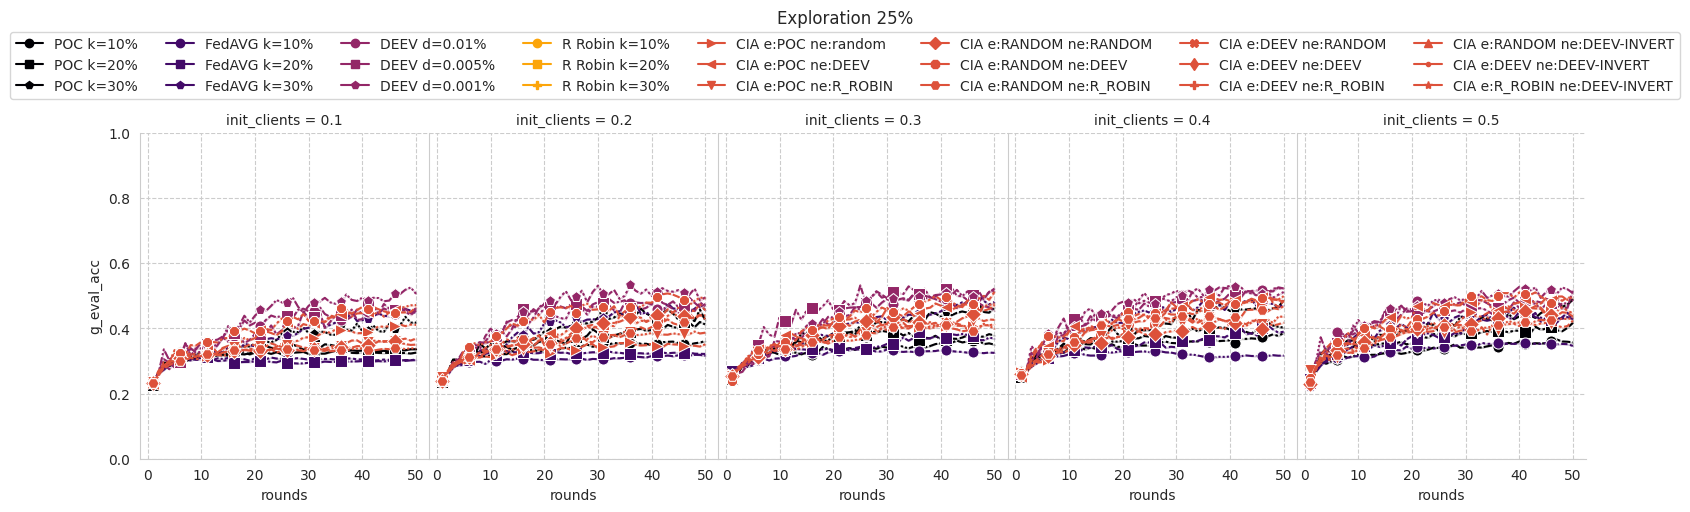

In [252]:
my_lineplot(data_25, legend_elements, "Exploration 25%", 'accuracy_0.50.png')

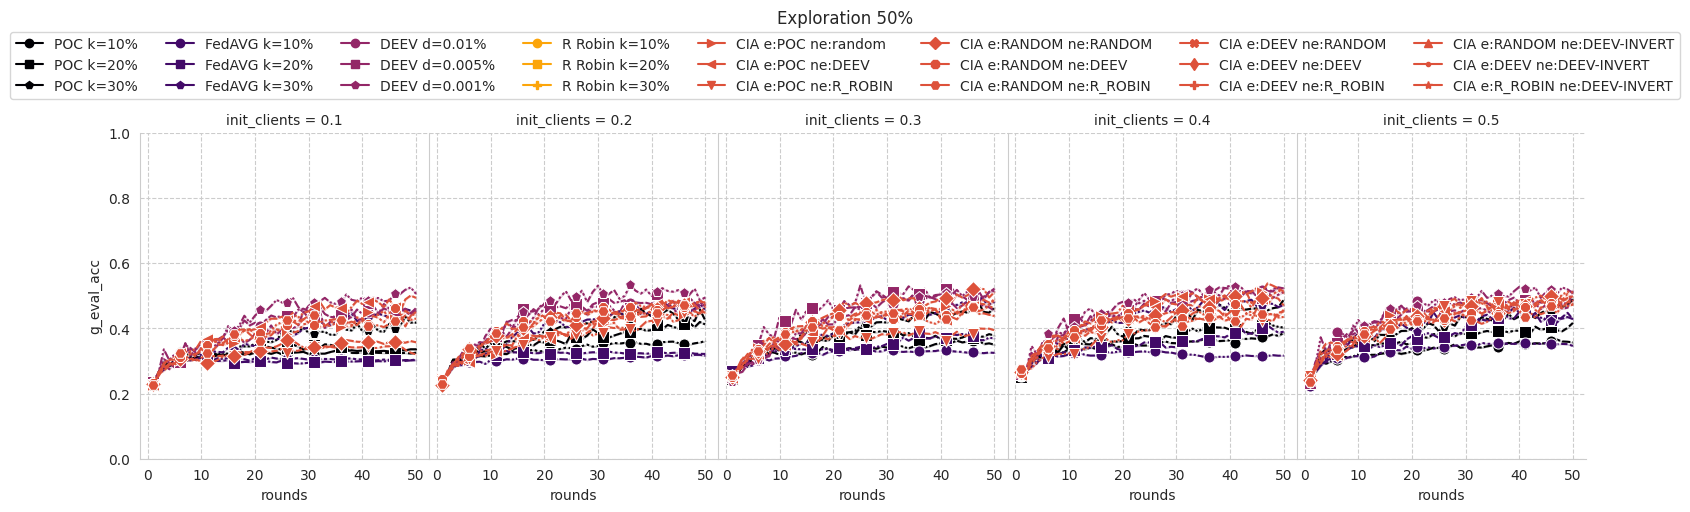

In [253]:
my_lineplot(data_50, legend_elements, "Exploration 50%", 'accuracy_50.png')

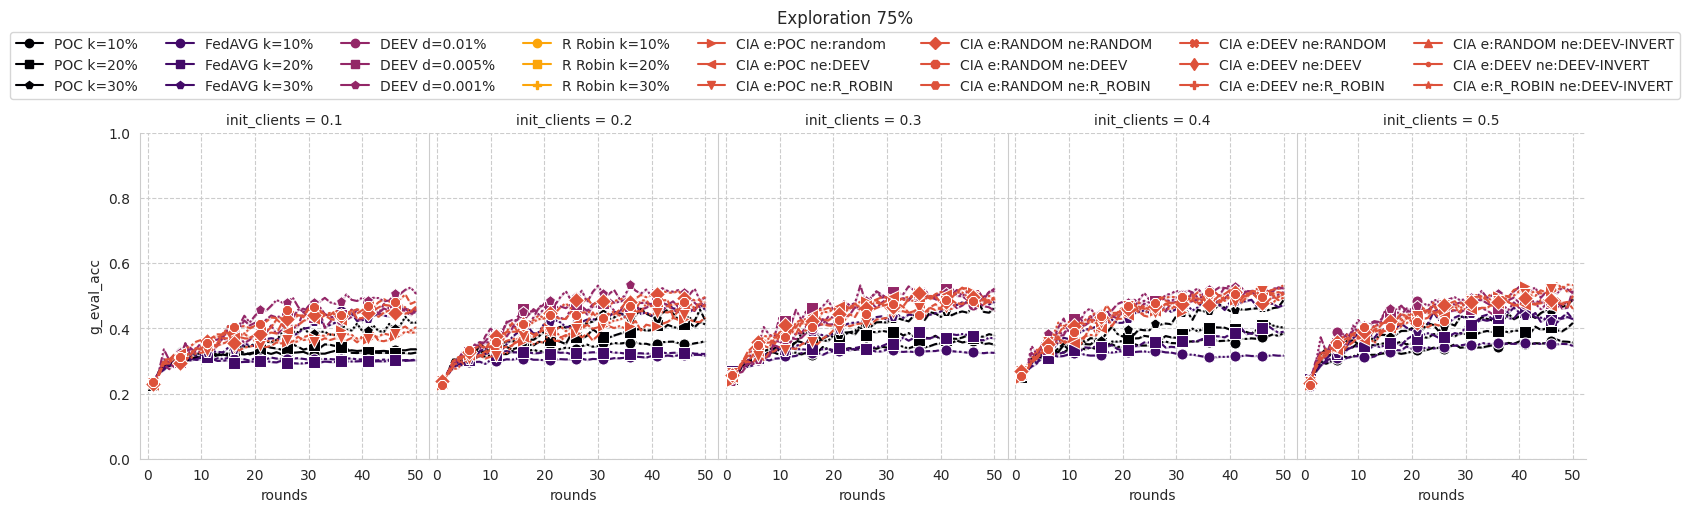

In [254]:
my_lineplot(data_75, legend_elements, "Exploration 75%", 'accuracy_0.75.png')

## Network waste

In [17]:
barplot_labels = [
    "POC k=10%","POC k=20%","POC k=30%",
    "FedAVG k=10%","FedAVG k=20%","FedAVG k=30%",
    "R Robin k=10%", "R Robin k=20%", "R Robin k=30%", 
    "DEEV d=0.01%","DEEV d=0.005%","DEEV d=0.001%",
    "FedCIA POC random","FedCIA POC DEEV","FedCIA POC R_ROBIN",
    "FedCIA RANDOM random","FedCIA RANDOM DEEV","FedCIA RANDOM R_ROBIN",
    "FedCIA DEEV random","FedCIA DEEV DEEV","FedCIA DEEV R_ROBIN",
    "FedCIA DEEV-INVERT random","FedCIA DEEV-INVERT DEEV","FedCIA DEEV-INVERT R_ROBIN",
]
c = plt.cm.inferno(np.linspace(0,1,len(barplot_labels)))
barplot_colors = dict(zip(barplot_labels, c))
barplot_colors

{'POC k=10%': array([1.4620e-03, 4.6600e-04, 1.3866e-02, 1.0000e+00]),
 'POC k=20%': array([0.022447, 0.017199, 0.097327, 1.      ]),
 'POC k=30%': array([0.071429, 0.040294, 0.196354, 1.      ]),
 'FedAVG k=10%': array([0.135778, 0.046856, 0.299776, 1.      ]),
 'FedAVG k=20%': array([0.211095, 0.03703 , 0.378563, 1.      ]),
 'FedAVG k=30%': array([0.284321, 0.043933, 0.416608, 1.      ]),
 'R Robin k=10%': array([0.354032, 0.066925, 0.430906, 1.      ]),
 'R Robin k=20%': array([0.422549, 0.092501, 0.432714, 1.      ]),
 'R Robin k=30%': array([0.497257, 0.119379, 0.424488, 1.      ]),
 'DEEV d=0.01%': array([0.565854, 0.143567, 0.408258, 1.      ]),
 'DEEV d=0.005%': array([0.633998, 0.168992, 0.383704, 1.      ]),
 'DEEV d=0.001%': array([0.700576, 0.197851, 0.351113, 1.      ]),
 'FedCIA POC random': array([0.76401 , 0.232554, 0.311399, 1.      ]),
 'FedCIA POC DEEV': array([0.822386, 0.275197, 0.266085, 1.      ]),
 'FedCIA POC R_ROBIN': array([0.873741, 0.326906, 0.216886, 1.  

In [18]:
bar_labels = []
for label in all_labels:
    if 'ic:10' in label:
        bar_labels.append((label, 0.1))
    elif 'ic:20' in label:
        bar_labels.append((label, 0.2))
    elif 'ic:30' in label:
        bar_labels.append((label, 0.3))
    elif 'ic:40' in label:
        bar_labels.append((label, 0.4))
    elif 'ic:50' in label:
        bar_labels.append((label, 0.5))
    elif 'ic:100' in label:
        bar_labels.append((label, 1.0))
i=130
bar_labels[i:i+10]

[('FedCIA RANDOM R_ROBIN ic:10 expl:50', 0.1),
 ('FedCIA RANDOM R_ROBIN ic:20 expl:50', 0.2),
 ('FedCIA RANDOM R_ROBIN ic:30 expl:50', 0.3),
 ('FedCIA RANDOM R_ROBIN ic:40 expl:50', 0.4),
 ('FedCIA RANDOM R_ROBIN ic:50 expl:50', 0.5),
 ('FedCIA RANDOM random ic:10 expl:75', 0.1),
 ('FedCIA RANDOM random ic:20 expl:75', 0.2),
 ('FedCIA RANDOM random ic:30 expl:75', 0.3),
 ('FedCIA RANDOM random ic:40 expl:75', 0.4),
 ('FedCIA RANDOM random ic:50 expl:75', 0.5)]

In [19]:
bar_colors = []
for i, label in enumerate(bar_labels):
    if "POC 10" in label[0]:
        bar_colors.append(barplot_colors["POC k=10%"])
    if "POC 20" in label[0]:
        bar_colors.append(barplot_colors["POC k=20%"])
    if "POC 30" in label[0]:
        bar_colors.append(barplot_colors["POC k=30%"])
    if "AVG 10" in label[0]:
        bar_colors.append(barplot_colors["FedAVG k=10%"])
    if "AVG 20" in label[0]:
        bar_colors.append(barplot_colors["FedAVG k=20%"])
    if "AVG 30" in label[0]:
        bar_colors.append(barplot_colors["FedAVG k=30%"])
    if "DEEV 0.01" in label[0]:
        bar_colors.append(barplot_colors["DEEV d=0.01%"])
    if "DEEV 0.005" in label[0]:
        bar_colors.append(barplot_colors["DEEV d=0.005%"])
    if "DEEV 0.001" in label[0]:
        bar_colors.append(barplot_colors["DEEV d=0.001%"])
    if "R_ROBIN 10" in label[0]:
        bar_colors.append(barplot_colors["R Robin k=10%"])
    if "R_ROBIN 20" in label[0]:
        bar_colors.append(barplot_colors["R Robin k=20%"])
    if "R_ROBIN 30" in label[0]:
        bar_colors.append(barplot_colors["R Robin k=30%"])
    if "FedCIA POC random" in label[0]:
        bar_colors.append(barplot_colors["FedCIA POC random"])
    if "FedCIA POC DEEV" in label[0]:
        bar_colors.append(barplot_colors["FedCIA POC DEEV"])
    if "FedCIA POC R_ROBIN" in label[0]:
        bar_colors.append(barplot_colors["FedCIA POC R_ROBIN"])
    if "FedCIA RANDOM random" in label[0]:
        bar_colors.append(barplot_colors["FedCIA RANDOM random"])
    if "FedCIA RANDOM DEEV" in label[0]:
        bar_colors.append(barplot_colors["FedCIA RANDOM DEEV"])
    if "FedCIA RANDOM R_ROBIN ic:20 expl:50" in label[0]:
        print(f"{i}")
        print(f"{label[0]}") 
    if "FedCIA RANDOM R_ROBIN" in label[0]:
        bar_colors.append(barplot_colors["FedCIA RANDOM R_ROBIN"])
    if "FedCIA DEEV random" in label[0]:
        bar_colors.append(barplot_colors["FedCIA DEEV random"])
    if "FedCIA DEEV DEEV" in label[0]:
        bar_colors.append(barplot_colors["FedCIA DEEV DEEV"])
    if "FedCIA DEEV R_ROBIN" in label[0]:
        bar_colors.append(barplot_colors["FedCIA DEEV R_ROBIN"])
    if "FedCIA DEEV-INVERT random" in label[0]:
        bar_colors.append(barplot_colors["FedCIA DEEV-INVERT random"])
    if "FedCIA DEEV-INVERT DEEV" in label[0]:
        bar_colors.append(barplot_colors["FedCIA DEEV-INVERT DEEV"])
    if "FedCIA DEEV-INVERT R_ROBIN" == label[0]:
        print("FedCIA DEEV-INVERT R_ROBIN" in label[0])
    if "FedCIA DEEV-INVERT R_ROBIN" in label[0]:
        bar_colors.append(barplot_colors["FedCIA DEEV-INVERT R_ROBIN"])
i=130
# print(len(bar_labels), len(bar_colors))
len(bar_colors)

131
FedCIA RANDOM R_ROBIN ic:20 expl:50


160

In [20]:
barplot_palette = dict(zip(bar_labels, bar_colors))
len(barplot_palette)
# barplot_palette[('FedCIA RANDOM R_ROBIN ic:20 expl:50', 0.2)]

160

In [21]:
bar_legends = []
for key, value in barplot_colors.items():
    # if "FedCIA" in key:
    bar_legends.append(Patch(label=key, color=value))

In [33]:
def my_barplot(df, legends, suptitle, filename_to_save):
    df['size'] = df['size'] / 1048576
    order = df.groupby('config_test')['size'].sum().sort_values().index
    
    g = sns.catplot(
        data=df.loc[
            (df['is_selected'] == True) &
            (df['rounds'] > 1) &
            (df['old_dynamic_engagement'] == False)
        ],
        y='size',
        x='config_test',
        hue=df[['config_test', 'init_clients']].apply(tuple, axis=1),
        col='init_clients',
        kind='bar',
        estimator=sum,
        # order = df.sort_values('size')['size'],
        palette=barplot_palette,
        sharey=True,
        sharex=False,
    )
    g._legend.remove()
    g.set_axis_labels("", "Mb")
    g.fig.set_size_inches(15,4)
    g.fig.subplots_adjust(right=1, hspace=0, wspace=0)
    for ax in g.axes.flatten():
        ax.set_xticklabels([])
    g.fig.legend(handles=legends, ncol=int(len(legends)/3), loc='center', bbox_to_anchor=(0.5,1.1))
    for ax in g.axes.flatten():
        ax.set_xticklabels([])
    g.fig.suptitle(suptitle, y=1.25)
    g.savefig(filename_to_save, dpi=500)


In [34]:
def my_barplot_total(df, legends, suptitle, filename_to_save):
    df['size'] = df['size'] / 1048576
    g = sns.catplot(
        data=df.loc[
            (df['is_selected'] == True) &
            (df['rounds'] > 1)
        ],
        y='size',
        x='config_test',
        hue=df[['config_test', 'init_clients']].apply(tuple, axis=1),
        col='init_clients',
        kind='bar',
        # order=df['size'],
        estimator=sum,
        palette=barplot_palette,
        sharey=True,
        sharex=False,
    )
    g._legend.remove()
    g.set_axis_labels("", "Mb")
    g.fig.set_size_inches(15,4)
    g.fig.subplots_adjust(right=1, hspace=0, wspace=0)
    for ax in g.axes.flatten():
        ax.set_xticklabels([])
    g.fig.legend(handles=legends, ncol=int(len(legends)/3), loc='center', bbox_to_anchor=(0.5,1.1))
    for ax in g.axes.flatten():
        ax.set_xticklabels([])
    g.fig.suptitle(suptitle, y=1.25)
    g.savefig(filename_to_save, dpi=500)


/home/rafael.jarczewski/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)


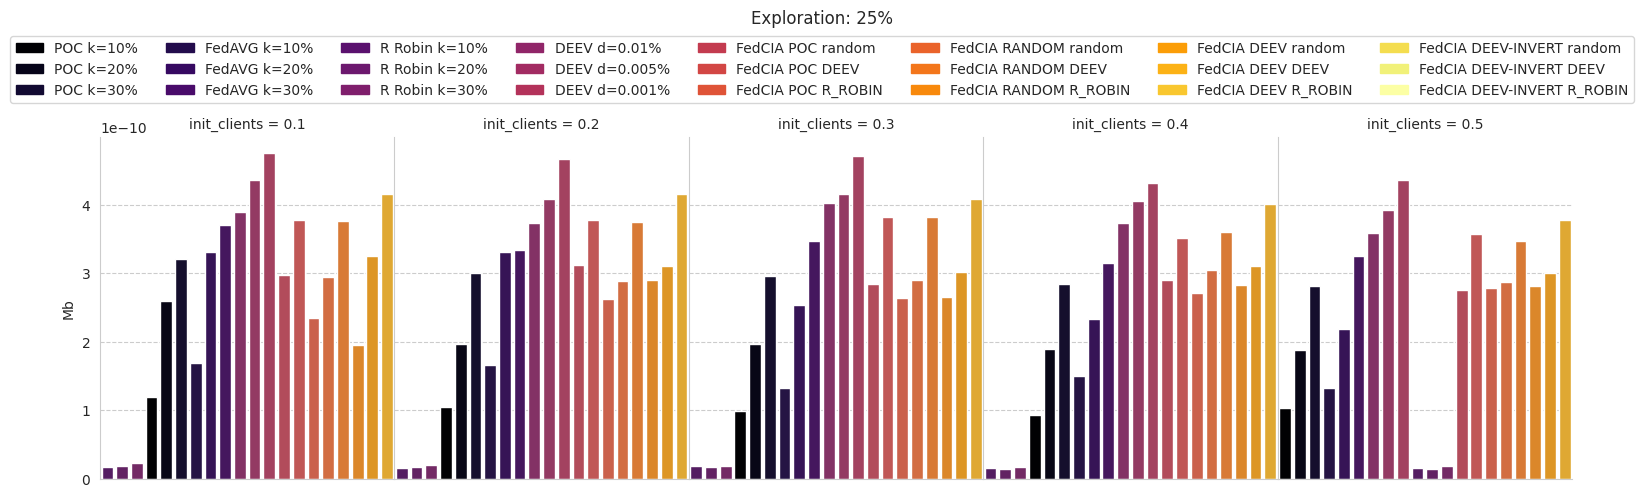

In [35]:
my_barplot(
    data_25,
    bar_legends,
    "Exploration: 25%",
    'waste_0.25.png',
)

In [ ]:
my_barplot_total(
    data_25,
    bar_legends,
    "Total Bandwidth - Exploration: 25%",
    'waste_0.25.png',
)

KeyboardInterrupt: 

KeyboardInterrupt: 

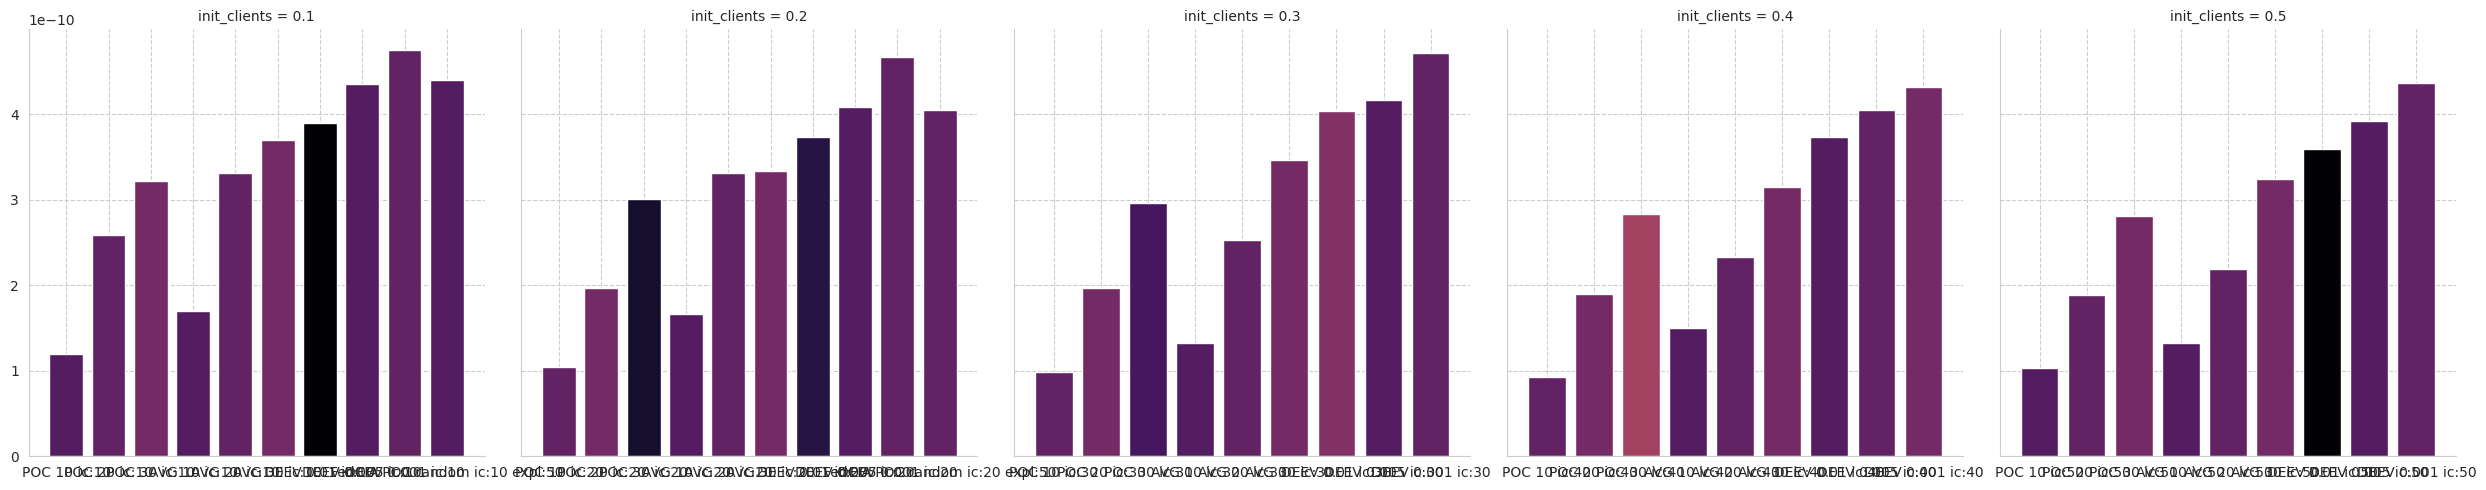

In [ ]:
my_barplot(
    data_50,
    bar_legends,
    "Exploration: 50%",
    'waste_0.50.png',
)

/home/rafael.jarczewski/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)


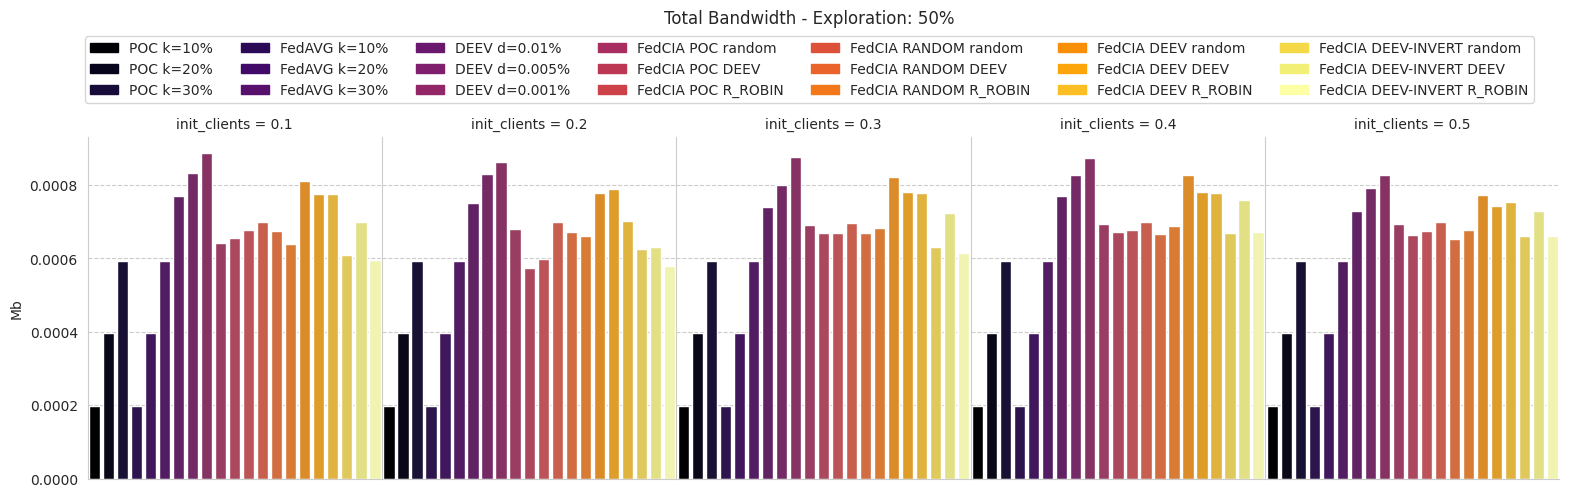

In [ ]:
my_barplot_total(
    data_50,
    bar_legends,
    "Total Bandwidth - Exploration: 50%",
    'waste_0.50.png',
)

/home/rafael.jarczewski/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)


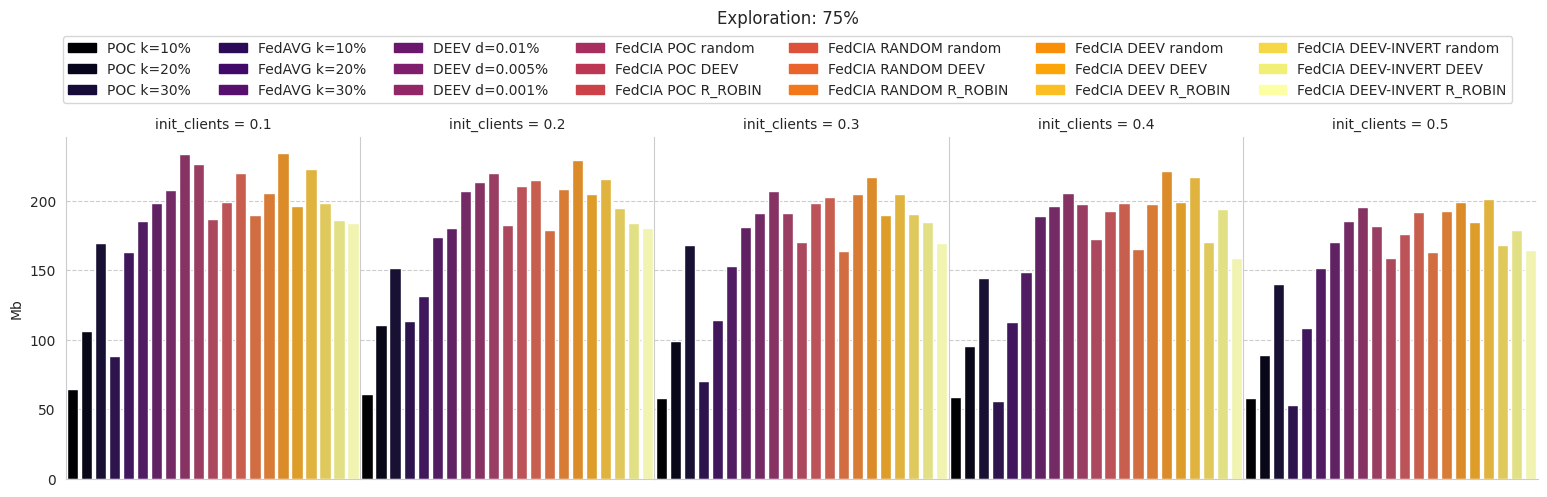

In [ ]:
my_barplot(
    data_75,
    bar_legends,
    "Exploration: 75%",
    'waste_0.75.png',
)

/home/rafael.jarczewski/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)


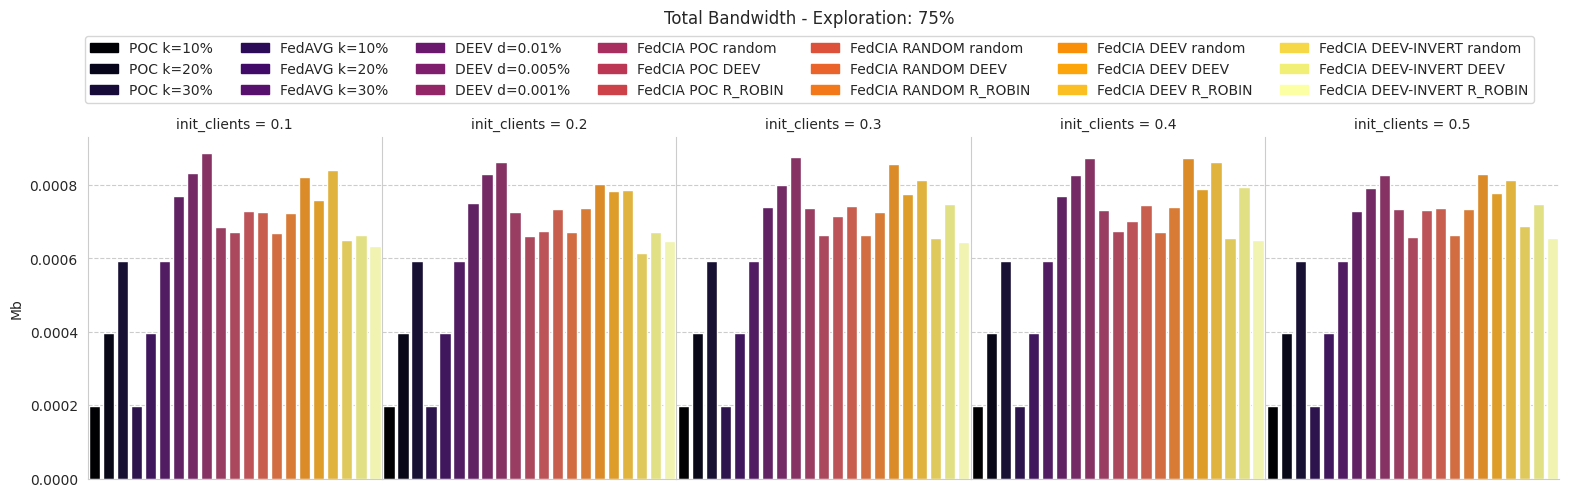

In [ ]:
my_barplot_total(
    data_75,
    bar_legends,
    "Total Bandwidth - Exploration: 75%",
    'waste_0.75.png',
)

## BOXPLOT

In [ ]:
o_data_s = raw_server_data.loc[(raw_server_data['config_test'].isin(others))]

In [ ]:
boxplot_25 = pd.concat([raw_server_data.loc[raw_server_data['exploration'] == 0.25], o_data_s])
boxplot_50 = pd.concat([raw_server_data.loc[raw_server_data['exploration'] == 0.50], o_data_s])
boxplot_75 = pd.concat([raw_server_data.loc[raw_server_data['exploration'] == 0.75], o_data_s])

In [ ]:
def my_boxplot(df, legends, suptitle, filename_to_save):
    g = sns.catplot(
        data=df,
        y='n_engaged',
        x='config_test',
        hue=df[['config_test', 'init_clients']].apply(tuple, axis=1),
        col='init_clients',
        kind='box',
        palette=barplot_palette,
        sharey=True,
        sharex=False,
        showfliers = False,
    )
    g._legend.remove()
    g.fig.set_size_inches(15,4)
    g.fig.subplots_adjust(right=1, hspace=0, wspace=0)
    for ax in g.axes.flatten():
        ax.set_xticklabels([])
        g.fig.legend(handles=legends, ncol=int(len(legends)/3), loc='center', bbox_to_anchor=(0.5, 1.1))
    g.set_axis_labels("", 'n_engaged')
    g.fig.suptitle(suptitle, y=1.25)
    g.savefig(filename_to_save)

/home/rafael.jarczewski/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)


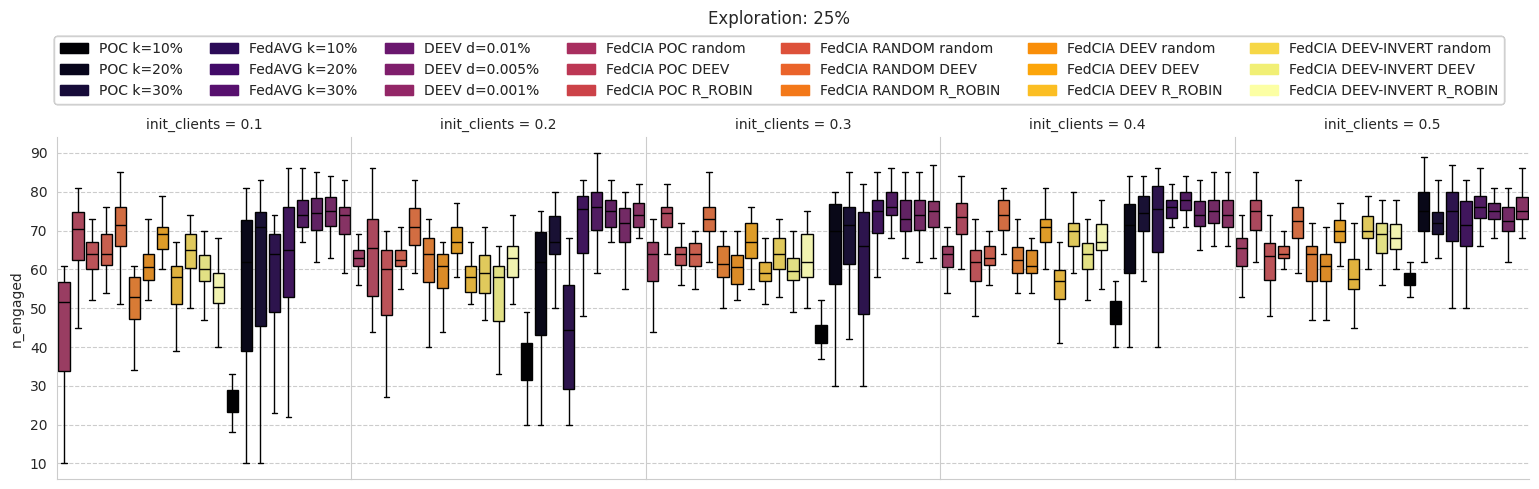

In [ ]:
my_boxplot(boxplot_25, bar_legends, "Exploration: 25%", "engaged_clients_0.25.png")

/home/rafael.jarczewski/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)


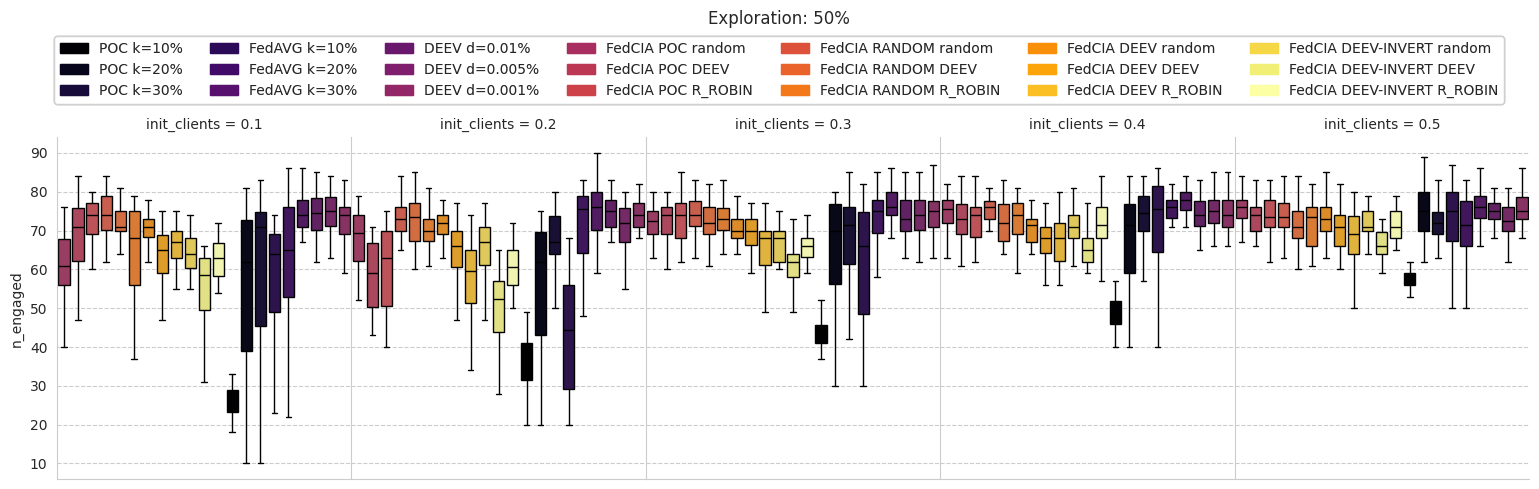

In [ ]:
my_boxplot(boxplot_50, bar_legends, "Exploration: 50%", "engaged_clients_0.50.png")

/home/rafael.jarczewski/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)


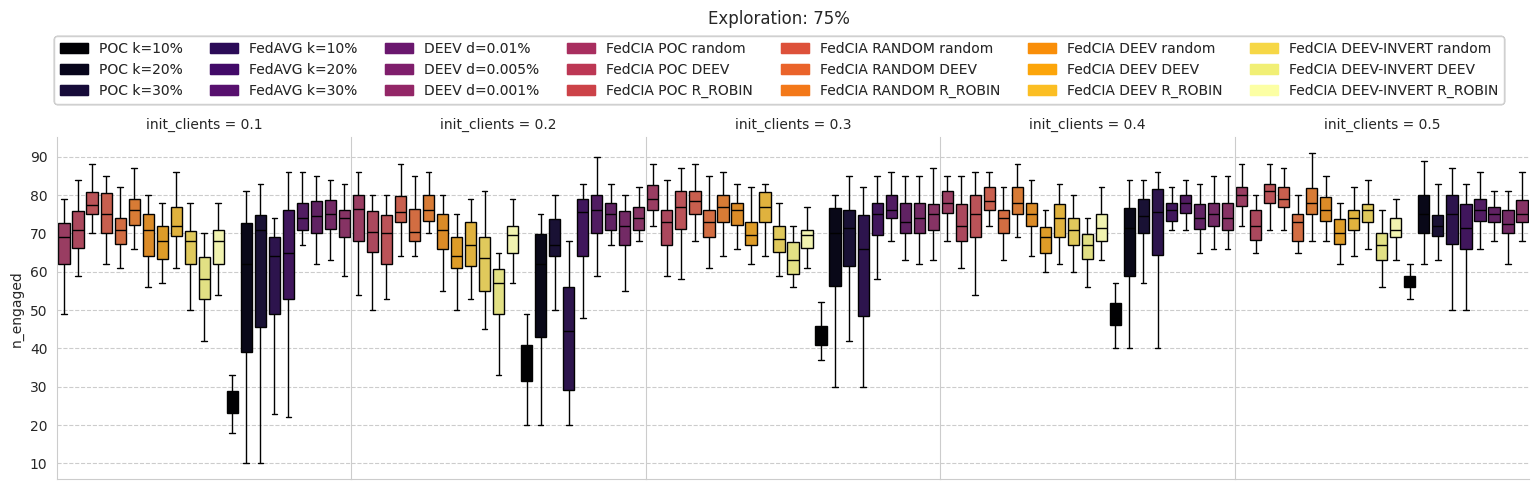

In [ ]:
my_boxplot(boxplot_75, bar_legends, "Exploration: 75%", "engaged_clients_0.75.png")


# ONLY CIA

In [ ]:
only_cia_c = raw_client_data.loc[raw_client_data['config_test'].str.contains('FedCIA')]
only_cia_s = raw_server_data.loc[raw_server_data['config_test'].str.contains('FedCIA')]
only_cia_c.head(1)

rounds  cid strategy select_client_method model_type  g_eval_acc  \
224999       1   59      cia               random        dnn        0.09   

        g_eval_loss  l_eval_acc  l_eval_loss  g_fit_acc  ...  dirichlet_alpha  \
224999   156.210297        0.09   156.210297   0.307692  ...              0.1   

        non_iid  dataset  exploitation  exploration  least_select_factor  \
224999     True    mnist          0.33         0.25                  0.0   

        decay  threshold  init_clients                      config_test  
224999  0.005        1.0           0.1  FedCIA POC random ic:10 expl:25  

[1 rows x 33 columns]

In [ ]:
only_cia_legend = []
for key, value in markers_base.items():
    if "CIA" in key:
        only_cia_legend.append(Line2D([0], [0], label=key, color=colors['cia'], marker=value))

## LinePlot

In [ ]:
only_data_25 = only_cia_c.loc[only_cia_c['exploration'] == 0.25]
only_data_50 = only_cia_c.loc[only_cia_c['exploration'] == 0.50]
only_data_75 = only_cia_c.loc[only_cia_c['exploration'] == 0.75]

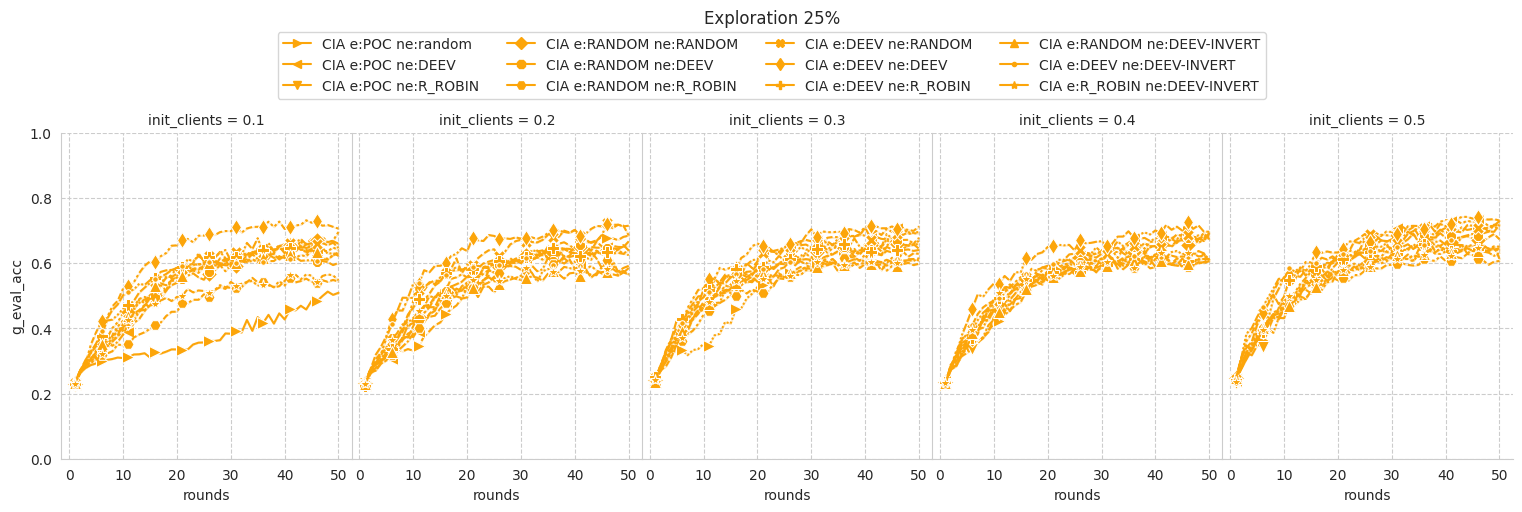

In [ ]:
my_lineplot(only_data_25, only_cia_legend, "Exploration 25%", 'only_acc_0.25.png')

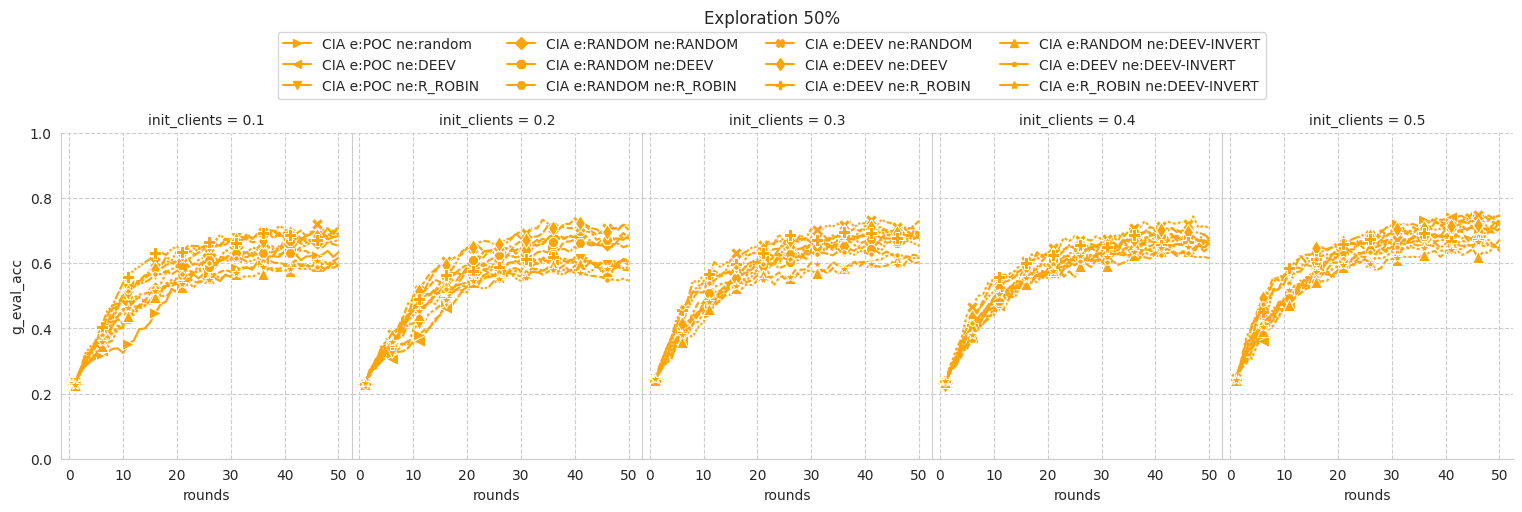

In [ ]:
my_lineplot(only_data_50, only_cia_legend, "Exploration 50%", "only_acc_0.50.png")

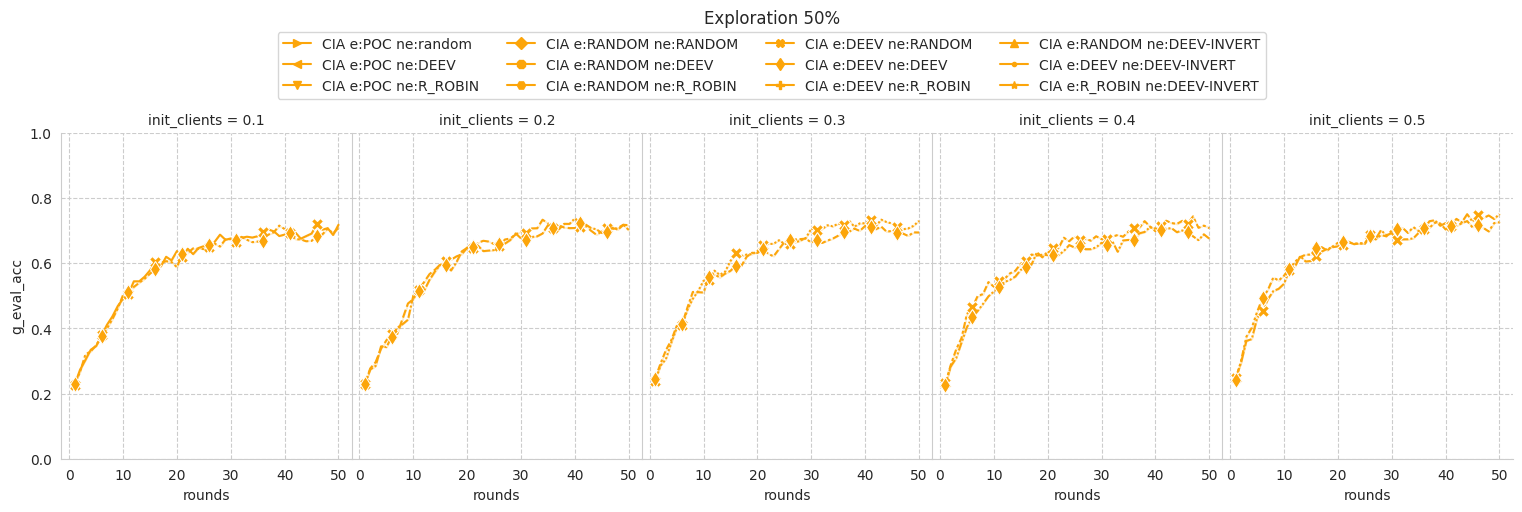

In [ ]:
my_lineplot(only_data_50.loc[
    (only_data_50['config_test'].str.contains('DEEV DEEV')) |
    (only_data_50['config_test'].str.contains('DEEV random'))
], only_cia_legend, "Exploration 50%", "only_acc_0.50.png")

## Barplot

In [ ]:
only_cia_bar_legends = []
for key, value in barplot_colors.items():
    if "FedCIA" in key:
        only_cia_bar_legends.append(Patch(label=key, color=value))

/tmp/ipykernel_1251135/3590768226.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['size'] = df['size'] / 1048576


/home/rafael.jarczewski/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)


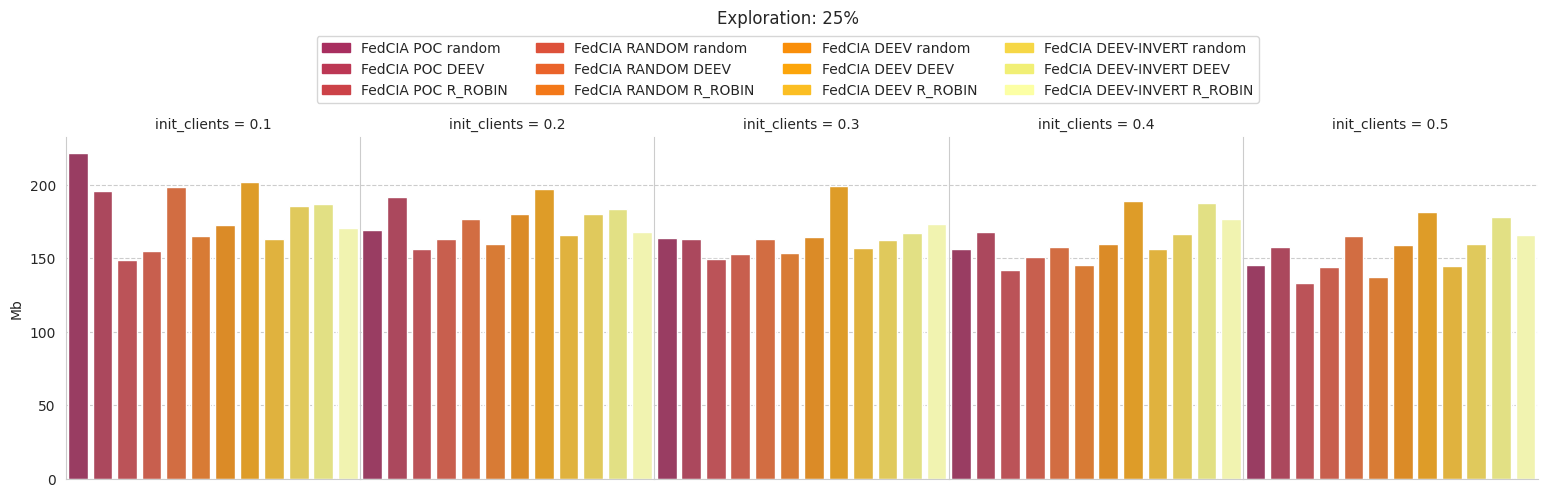

In [ ]:
my_barplot(
    only_data_25,
    only_cia_bar_legends,
    "Exploration: 25%",
    'waste_0.25.png',
)

/tmp/ipykernel_1251135/3590768226.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['size'] = df['size'] / 1048576


/home/rafael.jarczewski/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)


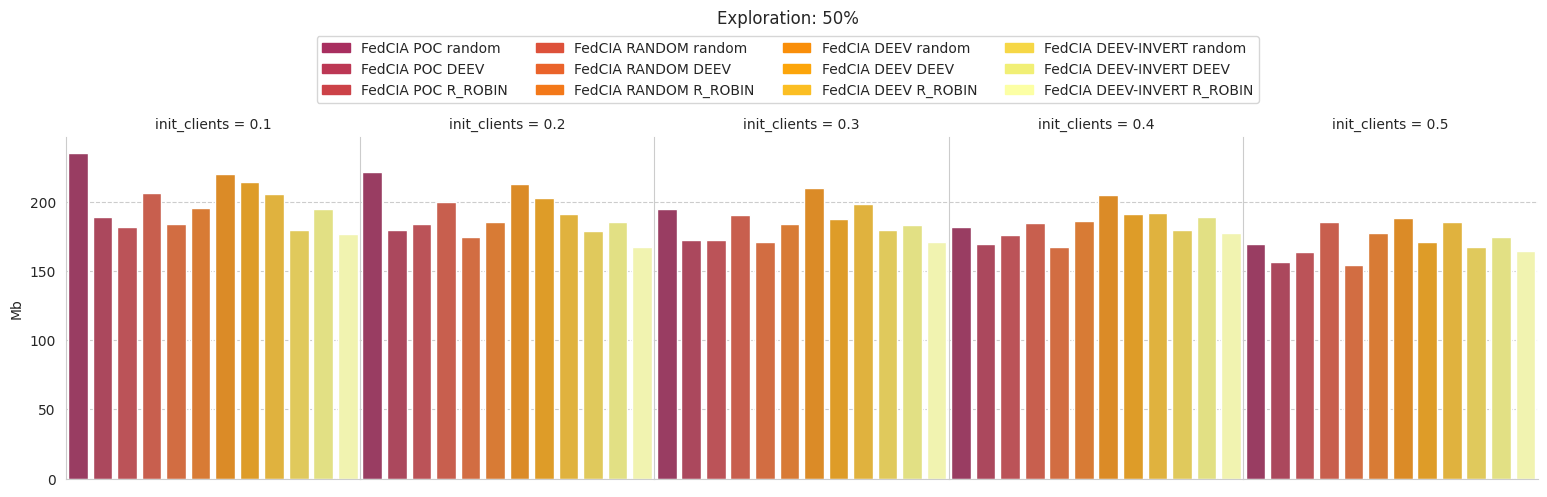

In [ ]:
my_barplot(
    only_data_50,
    only_cia_bar_legends,
    "Exploration: 50%",
    'waste_0.50.png',
)

/tmp/ipykernel_1251135/3590768226.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['size'] = df['size'] / 1048576
/home/rafael.jarczewski/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)


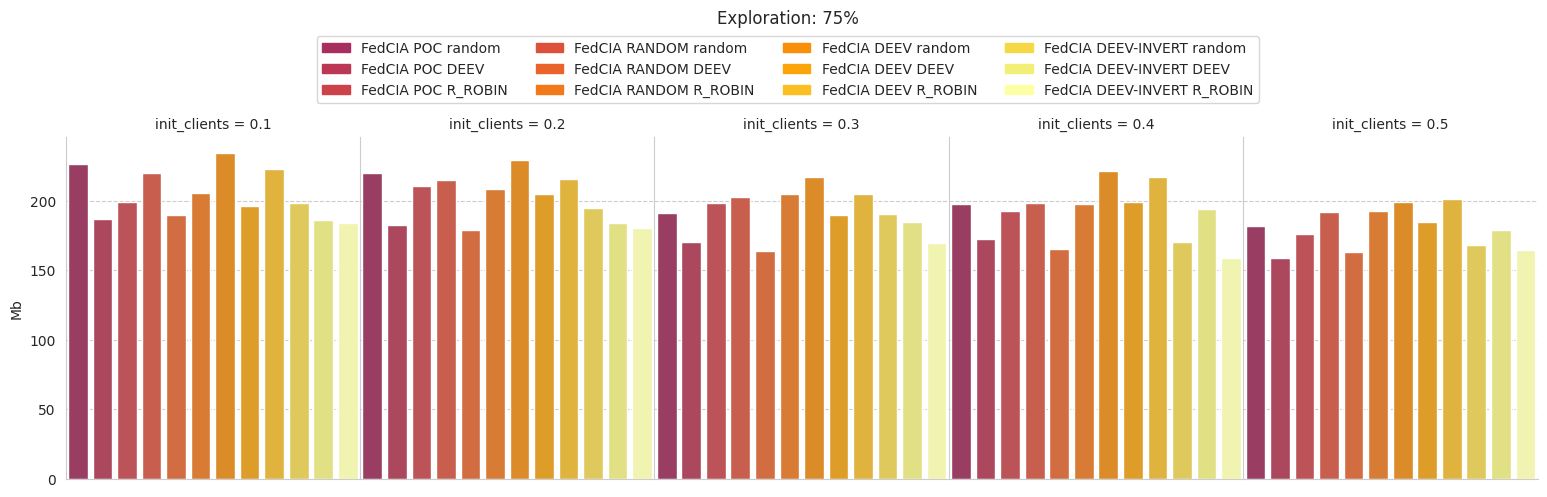

In [ ]:
my_barplot(
    only_data_75,
    only_cia_bar_legends,
    "Exploration: 75%",
    'waste_0.75.png',
)

## Boxplot

In [ ]:
only_cia_boxplot_25 = only_cia_s.loc[only_cia_s['exploration'] == 0.25]
only_cia_boxplot_50 = only_cia_s.loc[only_cia_s['exploration'] == 0.50]
only_cia_boxplot_75 = only_cia_s.loc[only_cia_s['exploration'] == 0.75]

/home/rafael.jarczewski/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)


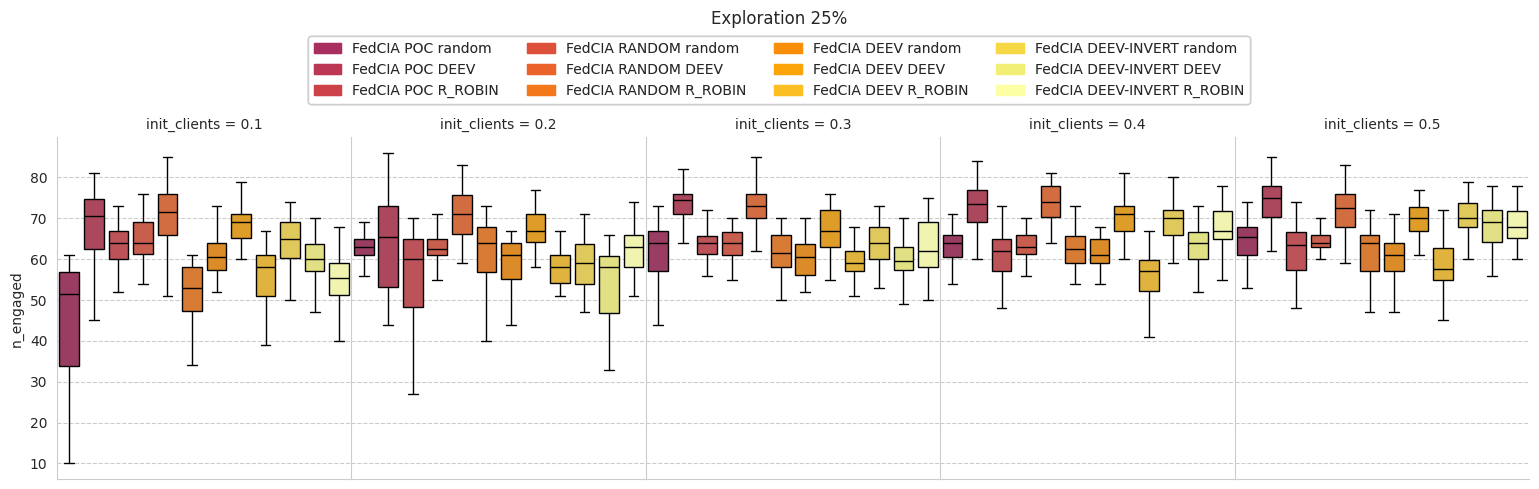

In [ ]:
my_boxplot(
    only_cia_boxplot_25,
    only_cia_bar_legends,
    "Exploration 25%",
    "only_cia_engaged_clients_0.25.png"
)

/home/rafael.jarczewski/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)


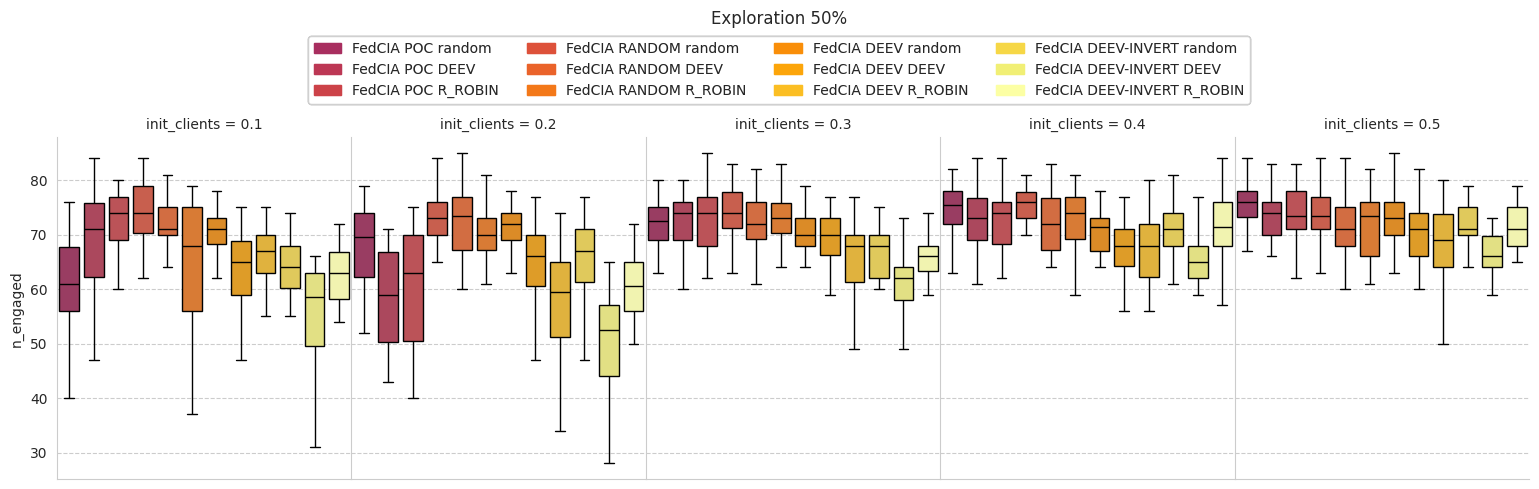

In [ ]:
my_boxplot(
    only_cia_boxplot_50,
    only_cia_bar_legends,
    "Exploration 50%",
    "only_cia_engaged_clients_0.50.png"
)

/home/rafael.jarczewski/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)


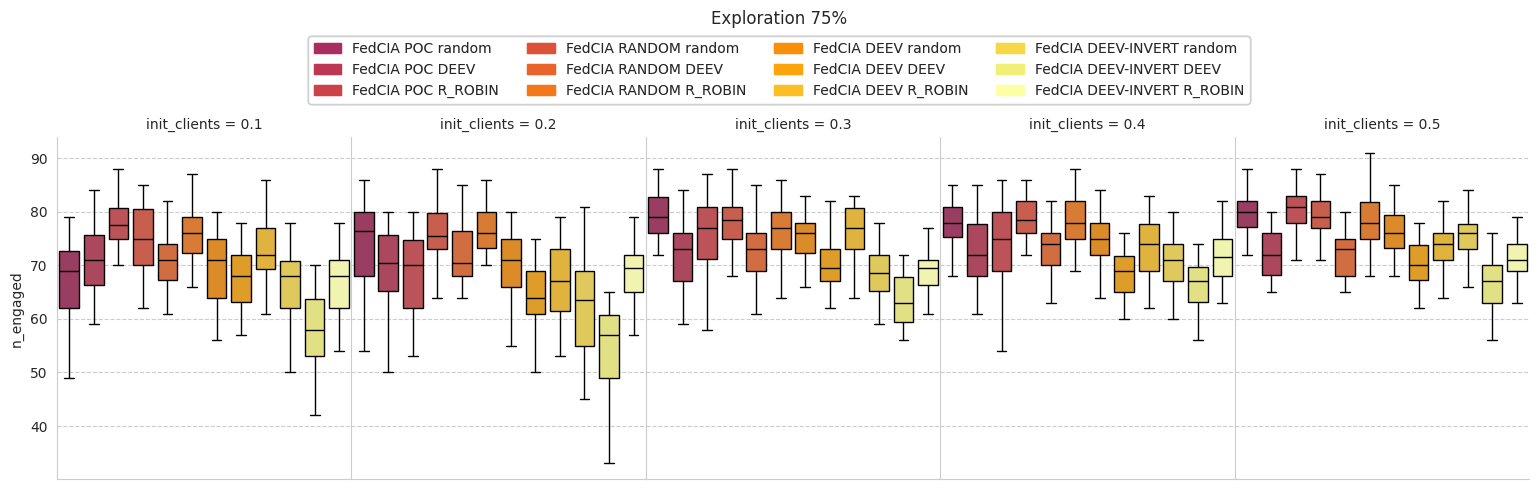

In [ ]:
my_boxplot(
    only_cia_boxplot_75,
    only_cia_bar_legends,
    "Exploration 75%",
    "only_cia_engaged_clients_0.75.png"
)

# Only literature

In [ ]:

only_l_data_c = raw_client_data.loc[raw_client_data['config_test'].isin(others)]
only_l_data_s = raw_server_data.loc[raw_server_data['config_test'].isin(others)]

In [ ]:
only_l_data_c.head()

rounds  cid strategy select_client_method model_type  g_eval_acc  \
0       1   90      poc               random        dnn        0.12   
1       1   30      poc               random        dnn        0.25   
2       1   76      poc               random        dnn        0.20   
3       1   62      poc               random        dnn        0.41   
4       1   61      poc               random        dnn        0.03   

   g_eval_loss  l_eval_acc  l_eval_loss  g_fit_acc  ...  dirichlet_alpha  \
0    93.254730        0.12    83.491554   0.823529  ...              0.1   
1   115.070076        0.23   132.604279   0.638719  ...              0.1   
2   167.529221        0.21   173.083984   0.825630  ...              0.1   
3    29.230371        0.42    29.217880   0.437100  ...              0.1   
4    82.844162        0.03    84.620773   0.010753  ...              0.1   

   non_iid  dataset  exploitation  exploration  least_select_factor  decay  \
0     True    mnist          0.33          0.1                  0.0  0.005   
1     True    mnist          0.33          0.1                  0.0  0.005   
2     True    mnist          0.33          0.1                  0.0  0.005   
3     True    mnist          0.33          0.1                  0.0  0.005   
4     True    mnist          0.33          0.1                  0.0  0.005   

   threshold  init_clients   config_test  
0        1.0           0.1  POC 10 ic:10  
1        1.0           0.1  POC 10 ic:10  
2        1.0           0.1  POC 10 ic:10  
3        1.0           0.1  POC 10 ic:10  
4        1.0           0.1  POC 10 ic:10  

[5 rows x 33 columns]

In [ ]:
only_cia_legend = []
for key, value in markers_base.items():
    if not "CIA" in key:
        if 'poc' in key.lower():
            color = 'poc'
        elif 'deev' in key.lower():
            color = 'deev'
        else:
            color = 'avg'
        only_cia_legend.append(Line2D([0], [0], label=key, color=colors[color], marker=value))

## Lineplot

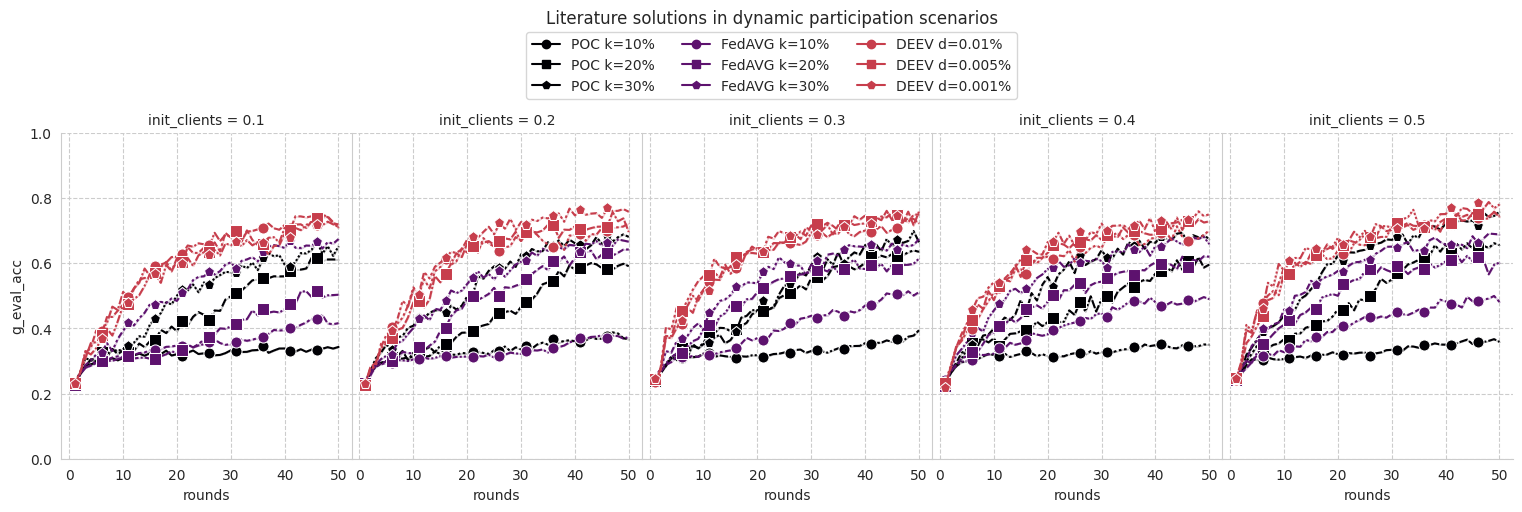

In [ ]:
my_lineplot(
    only_l_data_c,
    only_cia_legend,
    "Literature solutions in dynamic participation scenarios",
    'accuracy_only_l.png',
)

## Barplot

In [ ]:
bar_only_cia_legend = []
for key, value in barplot_colors.items():
    if not "FedCIA" in key:
        bar_only_cia_legend.append(Patch(label=key, color=value))

/tmp/ipykernel_1251135/3590768226.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['size'] = df['size'] / 1048576
/home/rafael.jarczewski/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)


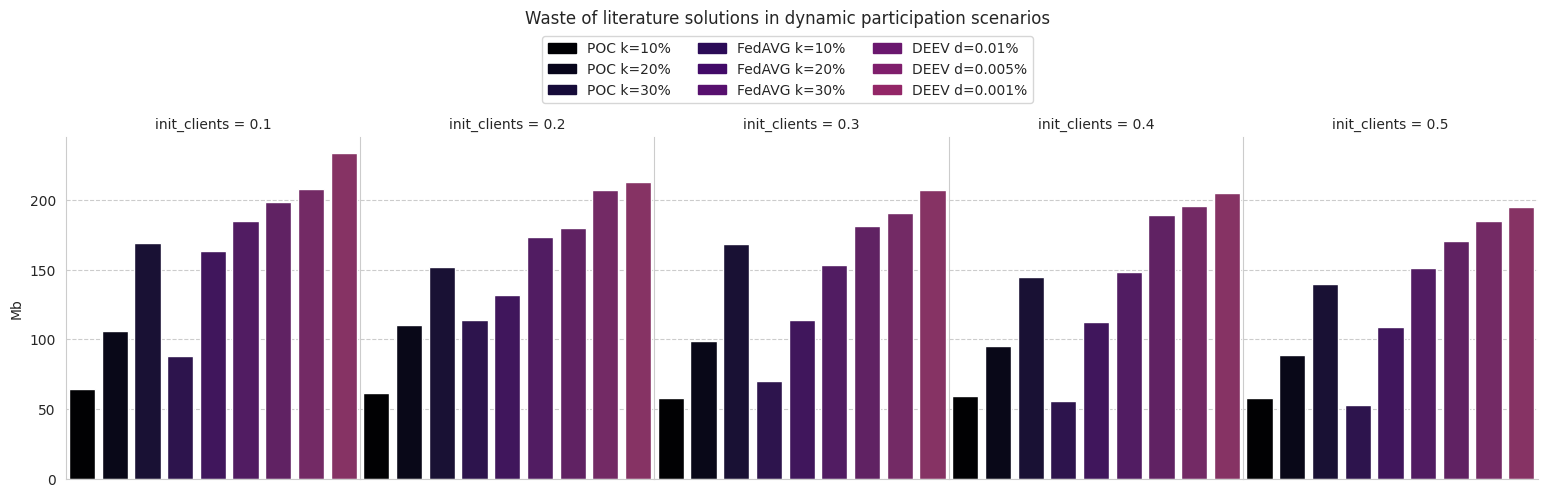

In [ ]:
my_barplot(
    only_l_data_c,
    bar_only_cia_legend,
    "Waste of literature solutions in dynamic participation scenarios",
    'l_waste.png',
)

## Boxplot

In [ ]:
def my_boxplot(df, legends, suptitle, filename_to_save):
    g = sns.catplot(
        data=df,
        y='n_selected',
        x='config_test',
        hue=df[['config_test', 'init_clients']].apply(tuple, axis=1),
        col='init_clients',
        kind='box',
        palette=barplot_palette,
        sharey=True,
        sharex=False,
        showfliers = False,
    )
    g._legend.remove()
    g.fig.set_size_inches(15,4)
    g.fig.subplots_adjust(right=1, hspace=0, wspace=0)
    for ax in g.axes.flatten():
        ax.set_xticklabels([])
        g.fig.legend(handles=legends, ncol=int(len(legends)/3), loc='center', bbox_to_anchor=(0.5, 1.1))
    g.set_axis_labels("", 'n_engaged')
    g.fig.suptitle(suptitle, y=1.25)
    g.savefig(filename_to_save)

/home/rafael.jarczewski/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)


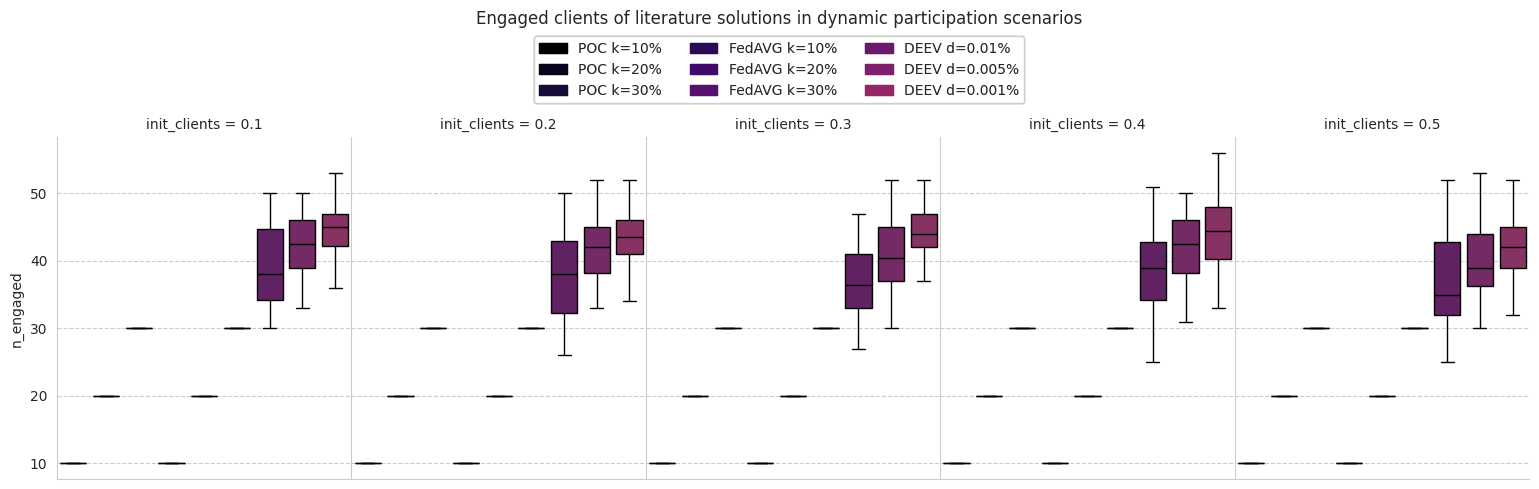

In [ ]:
my_boxplot(
    only_l_data_s,
    bar_only_cia_legend,
    "Engaged clients of literature solutions in dynamic participation scenarios",
    'l_engaged_clients.png',
)

# Banda dos clientes que não participaram foram selecionados e passaram a participar

In [ ]:
def my_barplot_new(df, legends, suptitle, filename_to_save):
    df['size'] = df['size'] / 1048576
    g = sns.catplot(
        data=df.loc[
            (df['is_selected'] == True) &
            (df['rounds'] > 1) &
            (df['old_dynamic_engagement'] == False) &
            (df['desire'] == True)
        ],
        y='size',
        x='config_test',
        hue=df[['config_test', 'init_clients']].apply(tuple, axis=1),
        col='init_clients',
        kind='bar',
        estimator=sum,
        palette=barplot_palette,
        sharey=True,
        sharex=False,
    )
    g._legend.remove()
    g.set_axis_labels("", "Mb")
    g.fig.set_size_inches(15,4)
    g.fig.subplots_adjust(right=1, hspace=0, wspace=0)
    for ax in g.axes.flatten():
        ax.set_xticklabels([])
    g.fig.legend(handles=legends, ncol=int(len(legends)/3), loc='center', bbox_to_anchor=(0.5,1.1))
    for ax in g.axes.flatten():
        ax.set_xticklabels([])
    g.fig.suptitle(suptitle, y=1.25)
    g.savefig(filename_to_save, dpi=500)


### Exploration 25%

/home/rafael.jarczewski/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)


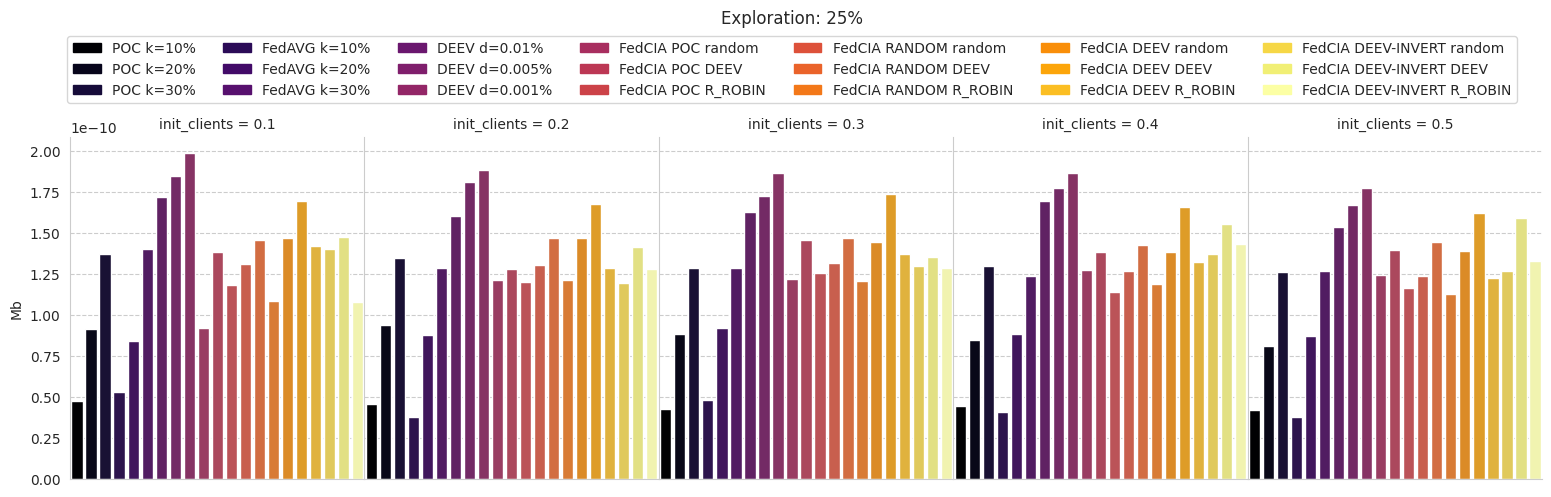

In [ ]:
my_barplot_new(
    data_25,
    bar_legends,
    "Exploration: 25%",
    'teste.png',
)

/home/rafael.jarczewski/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)


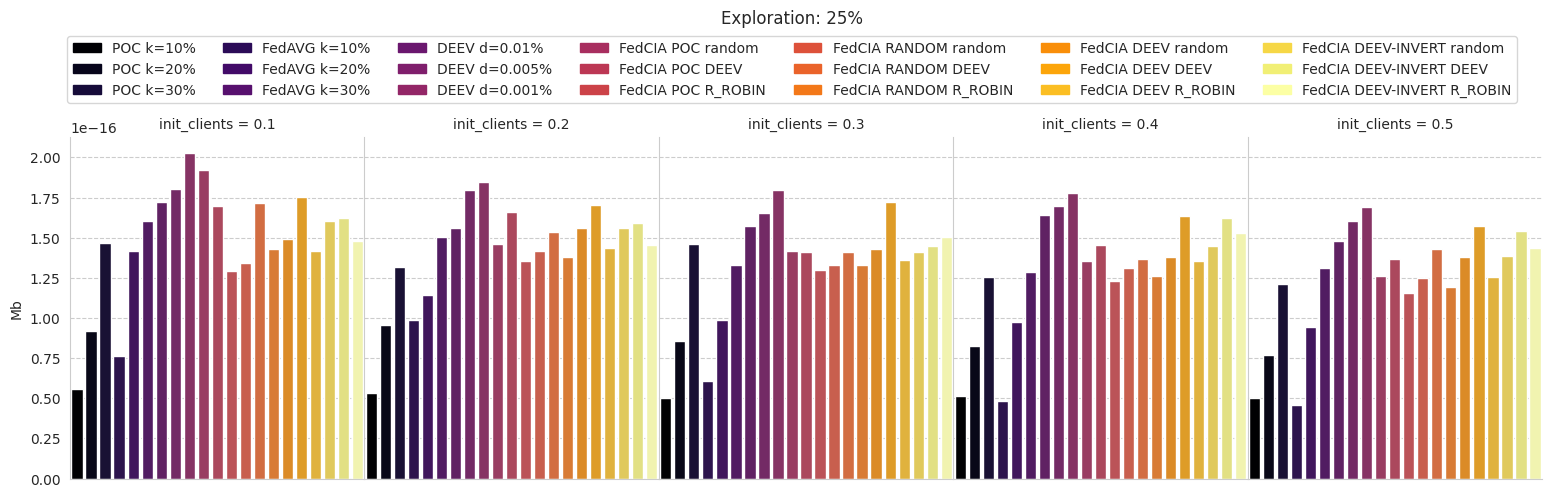

In [ ]:
my_barplot(
    data_25,
    bar_legends,
    "Exploration: 25%",
    'waste_0.25.png',
)

### Exploration 50%

/home/rafael.jarczewski/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)


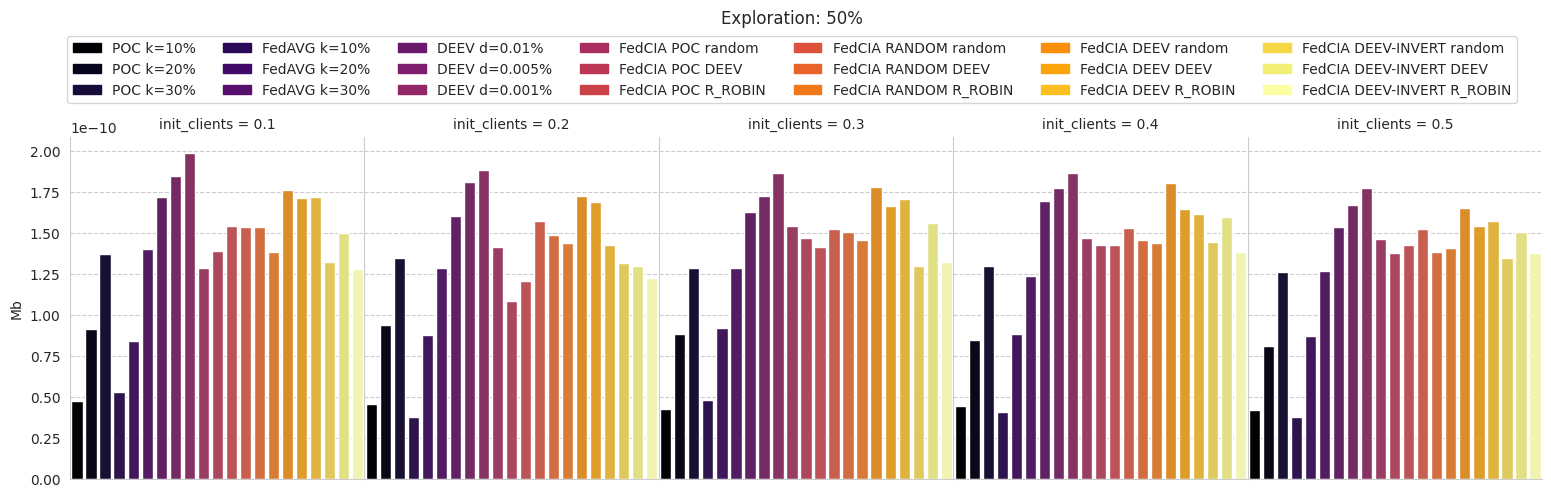

In [ ]:
my_barplot_new(
    data_50,
    bar_legends,
    "Exploration: 50%",
    'teste.png',
)

/home/rafael.jarczewski/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)


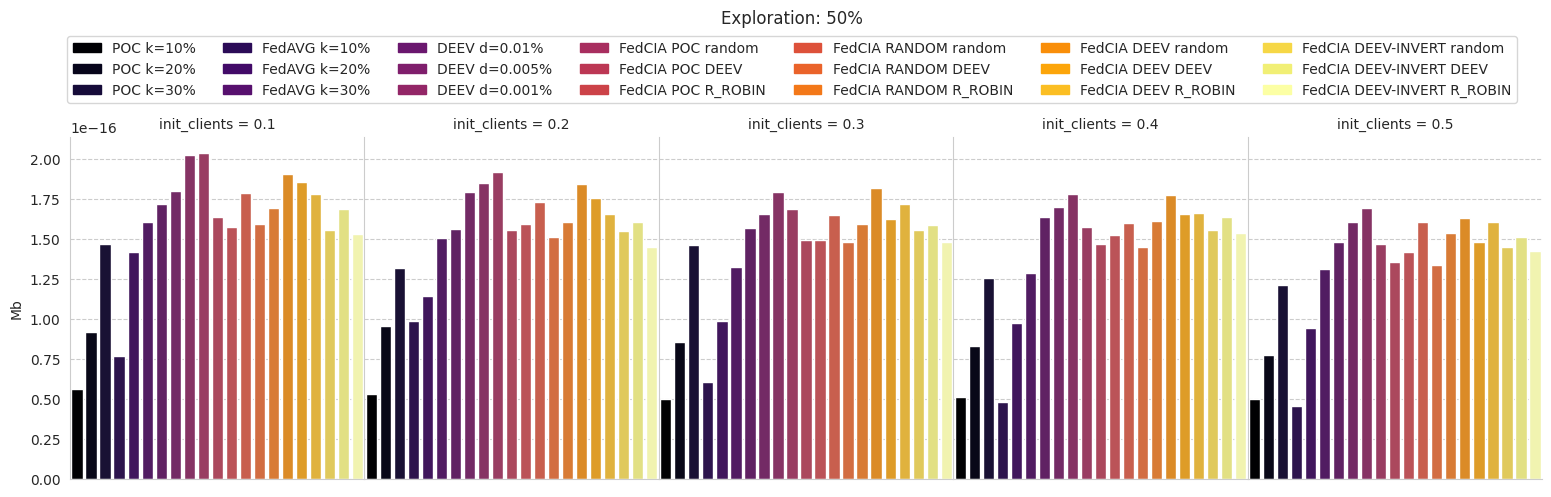

In [ ]:
my_barplot(
    data_50,
    bar_legends,
    "Exploration: 50%",
    'teste.png',
)

### Exploration 75%

/home/rafael.jarczewski/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)


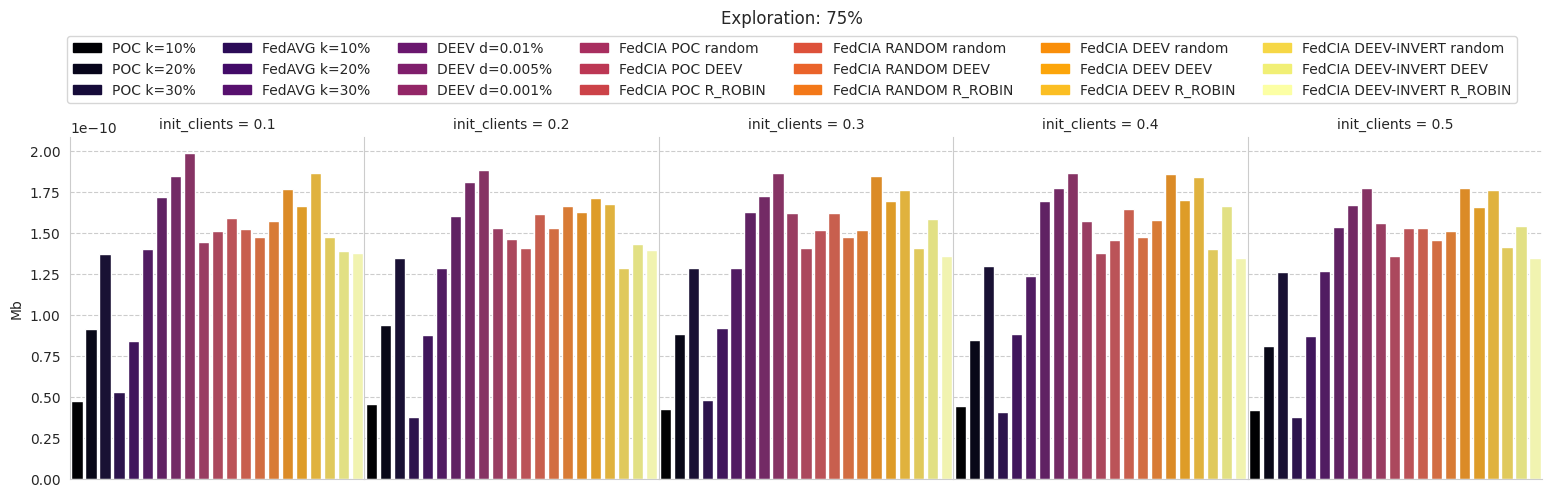

In [ ]:
my_barplot_new(
    data_75,
    bar_legends,
    "Exploration: 75%",
    'teste.png',
)

/home/rafael.jarczewski/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)


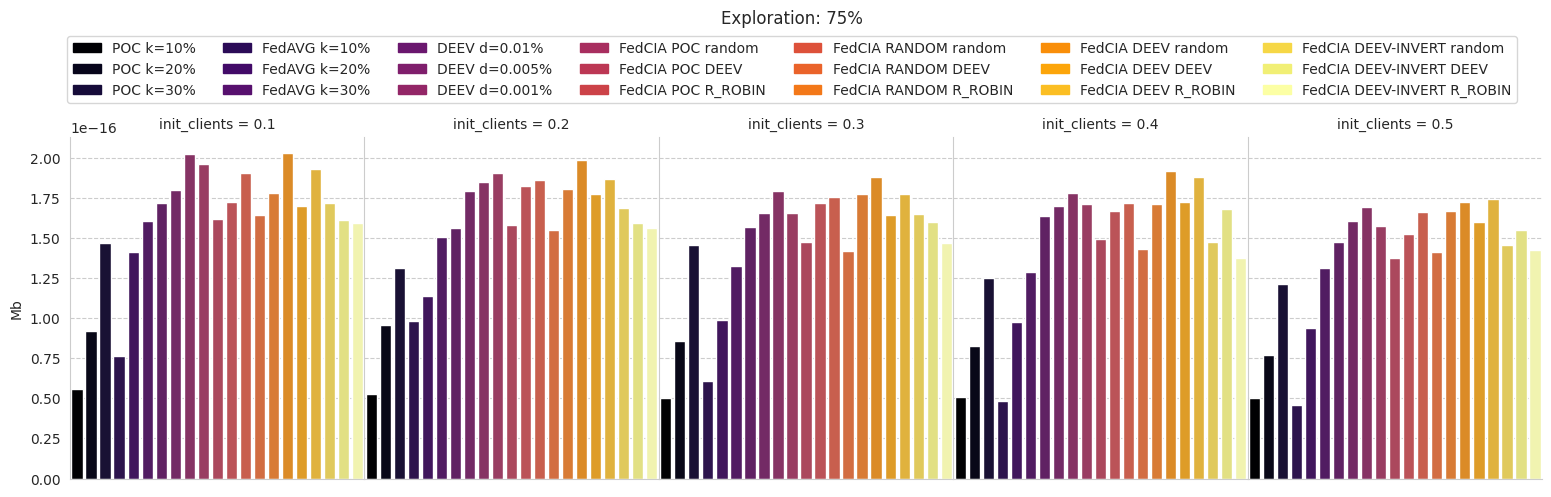

In [ ]:
my_barplot(
    data_75,
    bar_legends,
    "Exploration: 75%",
    'teste.png',
)

# Quantas vezes selecionou e os clientes sairam da federação

In [ ]:
def my_barplot_new_v2(df, legends, suptitle, filename_to_save):
    df['size'] = df['size'] / 1048576
    g = sns.catplot(
        data=df.loc[
            (df['is_selected'] == True) &
            (df['rounds'] > 1) &
            (df['old_dynamic_engagement'] == True) &
            (df['desire'] == False)
        ],
        y='size',
        x='config_test',
        hue=df[['config_test', 'init_clients']].apply(tuple, axis=1),
        col='init_clients',
        kind='bar',
        estimator=sum,
        palette=barplot_palette,
        sharey=True,
        sharex=False,
    )
    g._legend.remove()
    g.set_axis_labels("", "Mb")
    g.fig.set_size_inches(15,4)
    g.fig.subplots_adjust(right=1, hspace=0, wspace=0)
    for ax in g.axes.flatten():
        ax.set_xticklabels([])
    g.fig.legend(handles=legends, ncol=int(len(legends)/3), loc='center', bbox_to_anchor=(0.5,1.1))
    for ax in g.axes.flatten():
        ax.set_xticklabels([])
    g.fig.suptitle(suptitle, y=1.25)
    g.savefig(filename_to_save, dpi=500)


### Exploration 25%

/home/rafael.jarczewski/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)


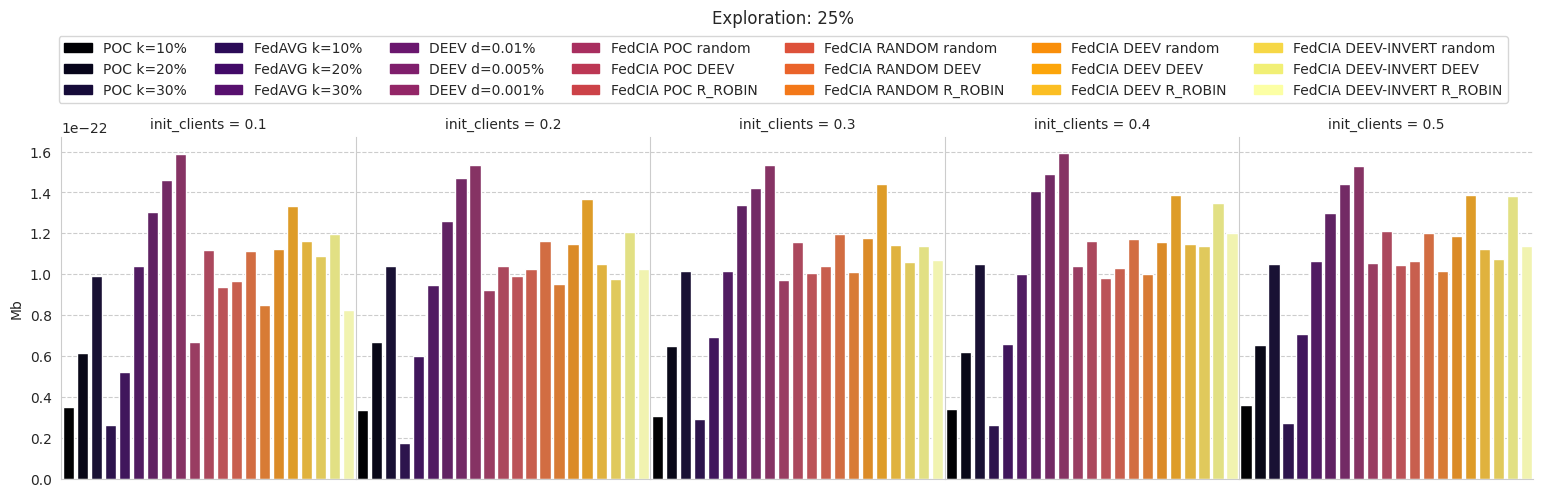

In [ ]:
my_barplot_new_v2(
    data_25,
    bar_legends,
    "Exploration: 25%",
    'teste.png',
)

/home/rafael.jarczewski/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)


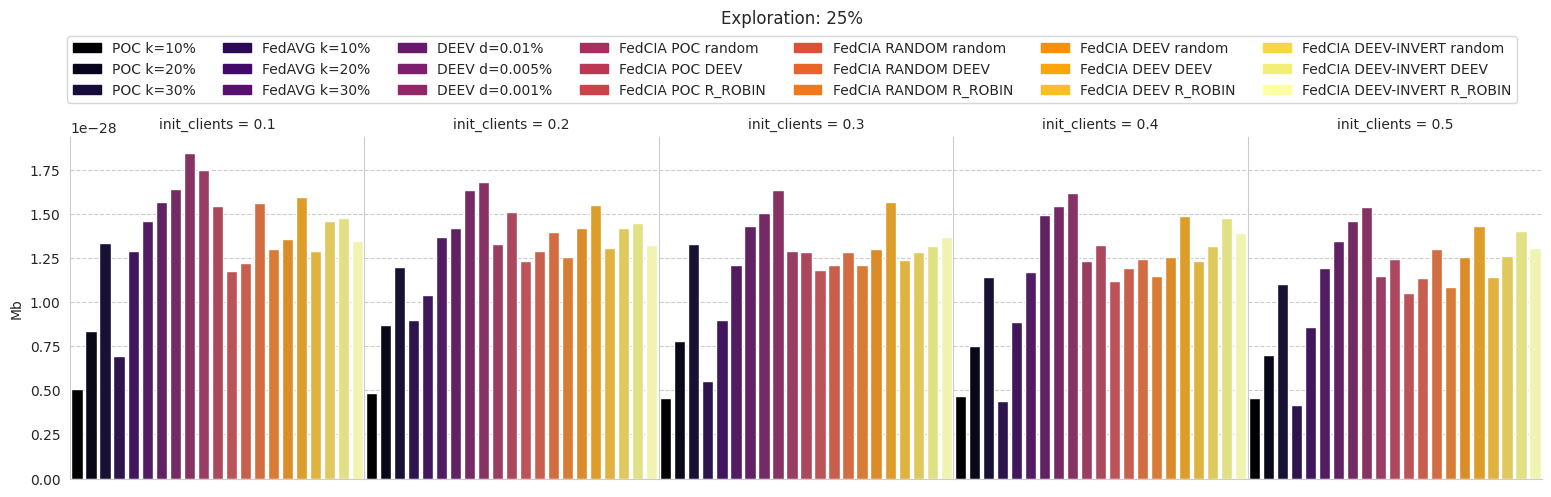

In [ ]:
my_barplot(
    data_25,
    bar_legends,
    "Exploration: 25%",
    'waste_0.25.png',
)

### Exploration 50%

/home/rafael.jarczewski/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)


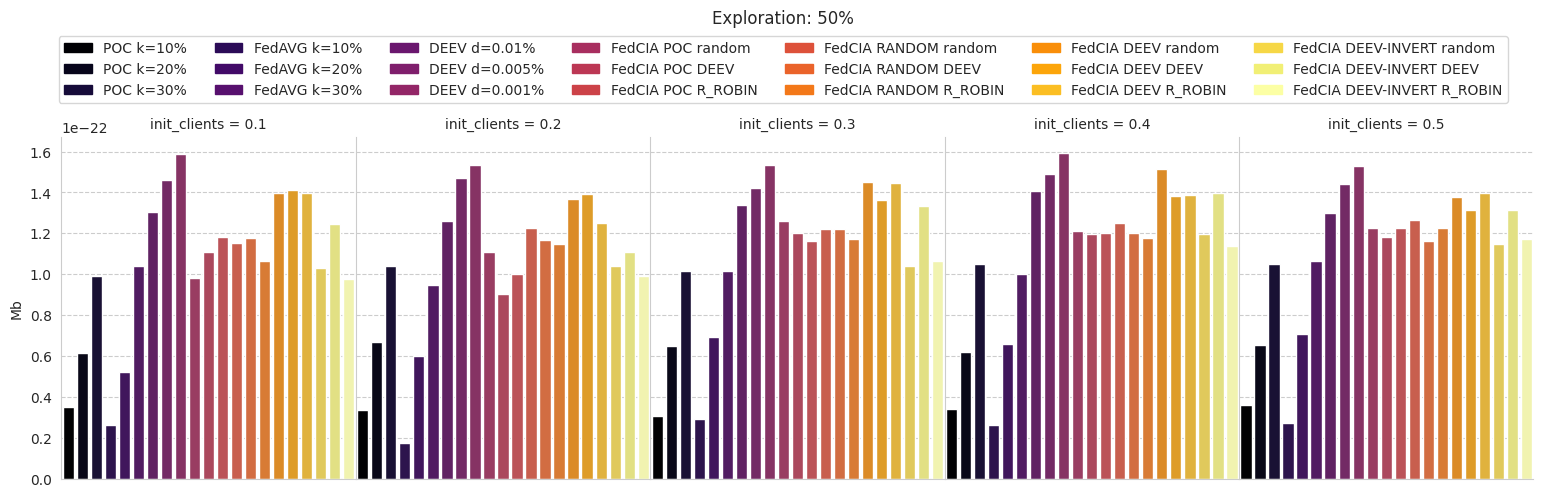

In [ ]:
my_barplot_new_v2(
    data_50,
    bar_legends,
    "Exploration: 50%",
    'teste.png',
)

/home/rafael.jarczewski/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)


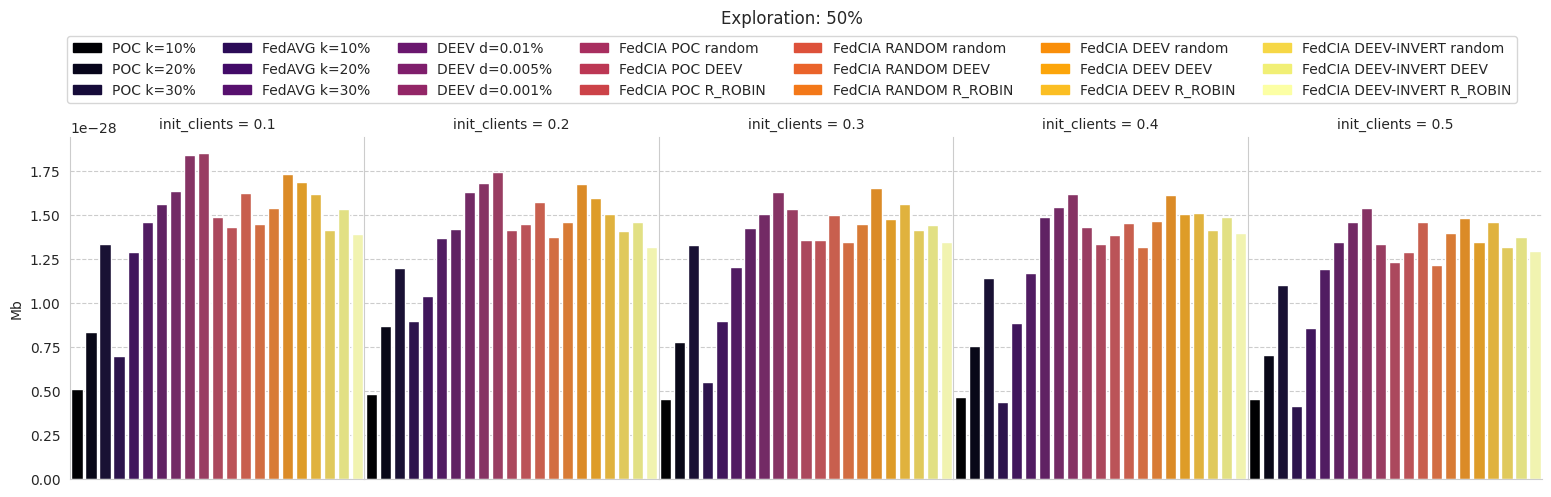

In [ ]:
my_barplot(
    data_50,
    bar_legends,
    "Exploration: 50%",
    'teste.png',
)

### Exploration 75%

/home/rafael.jarczewski/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)


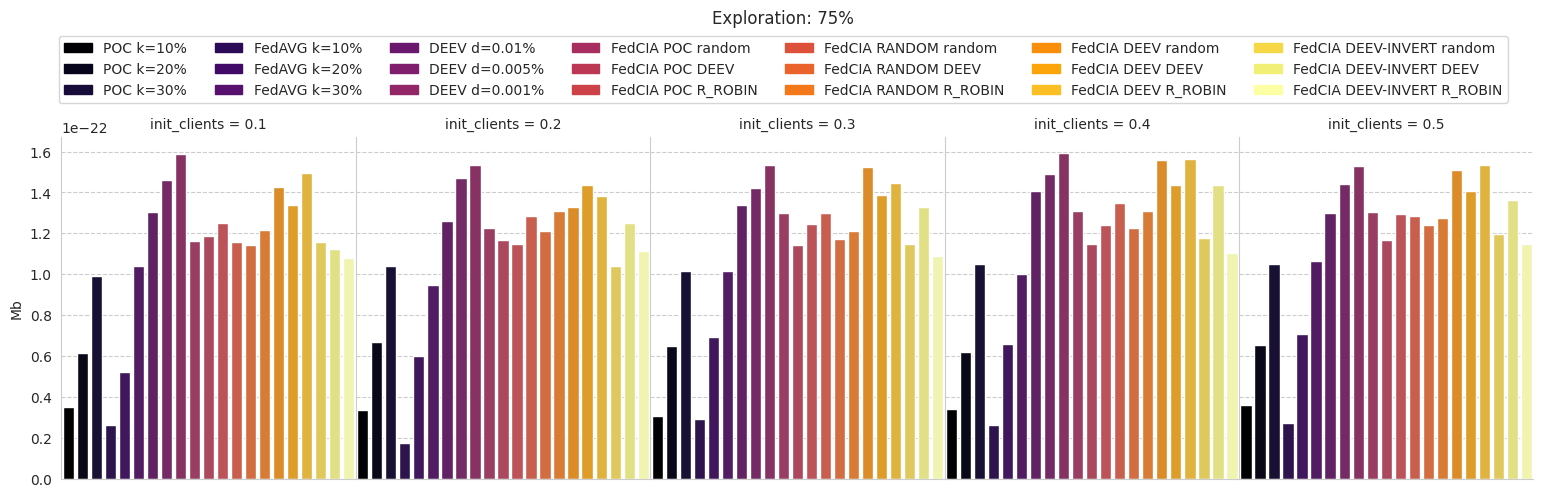

In [ ]:
my_barplot_new_v2(
    data_75,
    bar_legends,
    "Exploration: 75%",
    'teste.png',
)

/home/rafael.jarczewski/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)


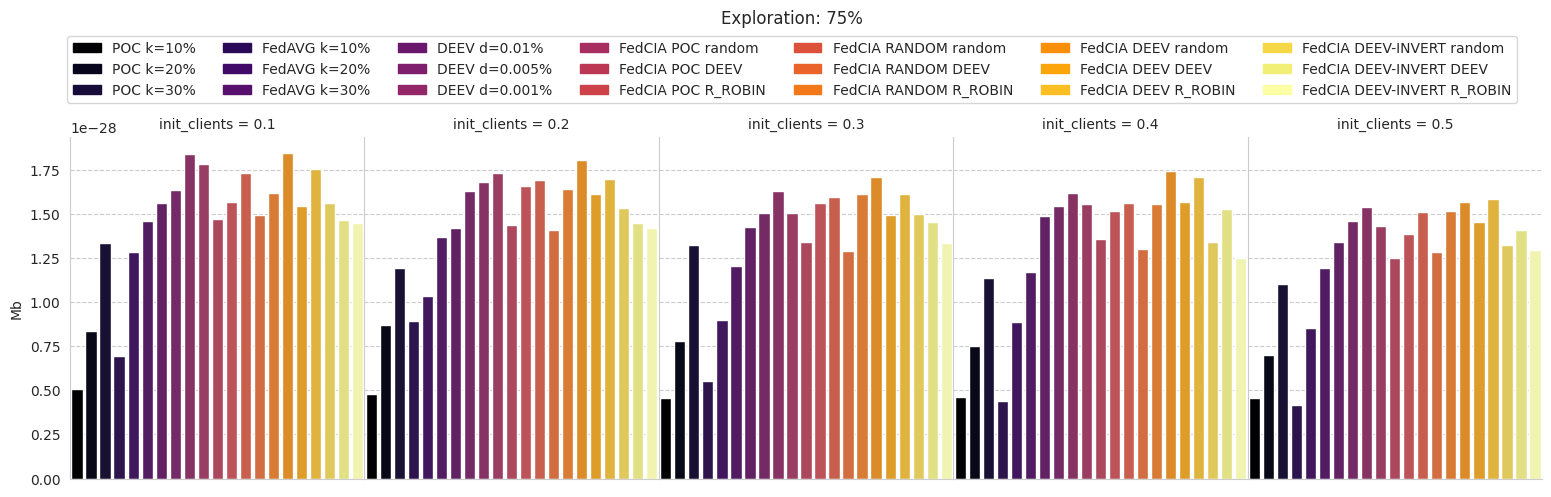

In [ ]:
my_barplot(
    data_75,
    bar_legends,
    "Exploration: 75%",
    'teste.png',
)

# Compare literature

In [ ]:
c_data_100 = pd.read_csv('logs/c-data.csv')
s_data_100 = pd.read_csv('logs/s-data.csv')

/tmp/ipykernel_1251135/569401705.py:1: DtypeWarning: Columns (0,13,14,15,16,24) have mixed types. Specify dtype option on import or set low_memory=False.
  c_data_100 = pd.read_csv('logs/c-data.csv')


In [ ]:
# c_data_100.to_csv("logs/c-data.csv", index=False)
# s_data_100.to_csv("logs/s-data.csv", index=False)

In [ ]:
compare_labels = [
    "Normal-POC", "POC",
    "Normal-AVG", "AVG",
    "Normal-DEEV", "DEEV",
]
c = plt.cm.inferno(np.linspace(0,1, len(compare_labels)))
compare_colors = dict(zip(compare_labels, c))
compare_colors

{'Normal-POC': array([1.4620e-03, 4.6600e-04, 1.3866e-02, 1.0000e+00]),
 'POC': array([0.258234, 0.038571, 0.406485, 1.      ]),
 'Normal-AVG': array([0.578304, 0.148039, 0.404411, 1.      ]),
 'AVG': array([0.865006, 0.316822, 0.226055, 1.      ]),
 'Normal-DEEV': array([0.987622, 0.64532 , 0.039886, 1.      ]),
 'DEEV': array([0.988362, 0.998364, 0.644924, 1.      ])}

In [ ]:
compare_labels_default = c_data_100['config_test'].unique()
line_plot_palette = dict()
for key in compare_labels_default:
    if 'poc' in key.lower():
        value = compare_colors['POC']
        if 'ic:100' in key:
            value = compare_colors['Normal-POC']
        line_plot_palette[key] = value
    if 'avg' in key.lower():
        value = compare_colors['AVG']
        if 'ic:100' in key:
            value = compare_colors['Normal-AVG']
        line_plot_palette[key] = value
    if 'deev' in key.lower():
        value = compare_colors['DEEV']
        if 'ic:100' in key:
            value = compare_colors['Normal-DEEV']
        line_plot_palette[key] = value
line_plot_palette

AttributeError: 'float' object has no attribute 'lower'

In [ ]:
compare_markers_base = {
    "POC k=10%": "o",
    "POC k=20%": "s",
    "POC k=30%": "P",
    "AVG k=10%": "o",
    "AVG k=20%": "s",
    "AVG k=30%": "P",
    "DEEV d=0.01": "o",
    "DEEV d=0.005": "s",
    "DEEV d=0.001": "P",
}
compare_markers = {
    'POC 10 ic:10': compare_markers_base['POC k=10%'],
    'POC 20 ic:10': compare_markers_base['POC k=20%'],
    'POC 30 ic:10': compare_markers_base['POC k=30%'],
    'AVG 10 ic:10': compare_markers_base['AVG k=10%'],
    'AVG 20 ic:10': compare_markers_base['AVG k=20%'],
    'AVG 30 ic:10': compare_markers_base['AVG k=30%'],
    'DEEV 0.01 ic:10': compare_markers_base['DEEV d=0.01'],
    'DEEV 0.005 ic:10': compare_markers_base['DEEV d=0.005'],
    'DEEV 0.001 ic:10': compare_markers_base['DEEV d=0.001'],
    'POC 10 ic:20': compare_markers_base['POC k=10%'],
    'POC 20 ic:20': compare_markers_base['POC k=20%'],
    'POC 30 ic:20': compare_markers_base['POC k=30%'],
    'AVG 10 ic:20': compare_markers_base['AVG k=10%'],
    'AVG 20 ic:20': compare_markers_base['AVG k=20%'],
    'AVG 30 ic:20': compare_markers_base['AVG k=30%'],
    'DEEV 0.01 ic:20': compare_markers_base['DEEV d=0.01'],
    'DEEV 0.005 ic:20': compare_markers_base['DEEV d=0.005'],
    'DEEV 0.001 ic:20': compare_markers_base['DEEV d=0.001'],
    'POC 10 ic:30': compare_markers_base['POC k=10%'],
    'POC 20 ic:30': compare_markers_base['POC k=20%'],
    'POC 30 ic:30': compare_markers_base['POC k=30%'],
    'AVG 10 ic:30': compare_markers_base['AVG k=10%'],
    'AVG 20 ic:30': compare_markers_base['AVG k=20%'],
    'AVG 30 ic:30': compare_markers_base['AVG k=30%'],
    'DEEV 0.01 ic:30': compare_markers_base['DEEV d=0.01'],
    'DEEV 0.005 ic:30': compare_markers_base['DEEV d=0.005'],
    'DEEV 0.001 ic:30': compare_markers_base['DEEV d=0.001'],
    'POC 10 ic:40': compare_markers_base['POC k=10%'],
    'POC 20 ic:40': compare_markers_base['POC k=20%'],
    'POC 30 ic:40': compare_markers_base['POC k=30%'],
    'AVG 10 ic:40': compare_markers_base['AVG k=10%'],
    'AVG 20 ic:40': compare_markers_base['AVG k=20%'],
    'AVG 30 ic:40': compare_markers_base['AVG k=30%'],
    'DEEV 0.01 ic:40': compare_markers_base['DEEV d=0.01'],
    'DEEV 0.005 ic:40': compare_markers_base['DEEV d=0.005'],
    'DEEV 0.001 ic:40': compare_markers_base['DEEV d=0.001'],
    'POC 10 ic:50': compare_markers_base['POC k=10%'],
    'POC 20 ic:50': compare_markers_base['POC k=20%'],
    'POC 30 ic:50': compare_markers_base['POC k=30%'],
    'AVG 10 ic:50': compare_markers_base['AVG k=10%'],
    'AVG 20 ic:50': compare_markers_base['AVG k=20%'],
    'AVG 30 ic:50': compare_markers_base['AVG k=30%'],
    'DEEV 0.01 ic:50': compare_markers_base['DEEV d=0.01'],
    'DEEV 0.005 ic:50': compare_markers_base['DEEV d=0.005'],
    'DEEV 0.001 ic:50': compare_markers_base['DEEV d=0.001'],
    'POC 10 ic:100': compare_markers_base['POC k=10%'],
    'POC 20 ic:100': compare_markers_base['POC k=20%'],
    'POC 30 ic:100': compare_markers_base['POC k=30%'],
    'AVG 10 ic:100': compare_markers_base['AVG k=10%'],
    'AVG 20 ic:100': compare_markers_base['AVG k=20%'],
    'AVG 30 ic:100': compare_markers_base['AVG k=30%'],
    'DEEV 0.01 ic:100': compare_markers_base['DEEV d=0.01'],
    'DEEV 0.005 ic:100': compare_markers_base['DEEV d=0.005'],
    'DEEV 0.001 ic:100': compare_markers_base['DEEV d=0.001'],
}


In [ ]:
# sns.lineplot(
#     data=data.loc[data['config_test'].str.contains("DEEV")],
#     x='rounds',
#     y='g_eval_acc',
#     hue='config_test',
#     errorbar=('ci', False)
# )

# TESTES

In [ ]:
df = raw_client_data.loc[
    (raw_client_data['is_selected'] == True) &
    (raw_client_data['old_dynamic_engagement'] == True) &
    (raw_client_data['desire'] == True)
].groupby(['config_test', 'rounds']).count()
df = df.rename(columns={'cid': 'no_swap_engagement'}).reset_index()
new_df = pd.merge(
    raw_server_data, 
    df[['config_test', 'rounds', 'no_swap_engagement']],
    how='left', left_on=['config_test', 'rounds'],
    right_on=['config_test', 'rounds']
)[['config_test', 'init_clients', 'rounds', 'no_swap_engagement', 'exploration']].fillna(0)
# ---------------------------------------------
df = raw_client_data.loc[
    (raw_client_data['is_selected'] == True) &
    (raw_client_data['old_dynamic_engagement'] == True) &
    (raw_client_data['desire'] == False)
].groupby(['config_test', 'rounds']).count()
df = df.rename(columns={'cid': 'amount'}).reset_index()
new_df['swap_engagement'] = pd.merge(
    raw_server_data,
    df[['config_test', 'rounds', 'amount']],
    how='left', left_on=['config_test', 'rounds'],
    right_on=['config_test', 'rounds']
)[['config_test', 'init_clients', 'rounds', 'amount', 'exploration']].fillna(0)['amount']
# ---------------------------------------------
df = raw_client_data.loc[
    (raw_client_data['is_selected'] == True) &
    (raw_client_data['old_dynamic_engagement'] == False) &
    (raw_client_data['desire'] == False)
].groupby(['config_test', 'rounds']).count()
df = df.rename(columns={'cid': 'amount'}).reset_index()
new_df['no_swap_not_engagement'] = pd.merge(
    raw_server_data,
    df[['config_test', 'rounds', 'amount']],
    how='left', left_on=['config_test', 'rounds'],
    right_on=['config_test', 'rounds']
)[['config_test', 'init_clients', 'rounds', 'amount', 'exploration']].fillna(0)['amount']
# ---------------------------------------------
df = raw_client_data.loc[
    (raw_client_data['is_selected'] == True) &
    (raw_client_data['old_dynamic_engagement'] == False) &
    (raw_client_data['desire'] == True)
].groupby(['config_test', 'rounds']).count()
df = df.rename(columns={'cid': 'amount'}).reset_index()
new_df['swap_not_engagement'] = pd.merge(
    raw_server_data, df[['config_test', 'rounds', 'amount']],
    how='left',
    left_on=['config_test', 'rounds'],
    right_on=['config_test', 'rounds']
)[['config_test', 'init_clients', 'rounds', 'amount', 'exploration']].fillna(0)['amount']
# ---------------------------------------------
new_df['gain'] = new_df['swap_not_engagement'] - new_df['swap_engagement']
new_df.head()

config_test  init_clients  rounds  no_swap_engagement  exploration  \
0  POC 10 ic:10           0.1       1                10.0          0.1   
1  POC 10 ic:10           0.1       2                 0.0          0.1   
2  POC 10 ic:10           0.1       3                 7.0          0.1   
3  POC 10 ic:10           0.1       4                 5.0          0.1   
4  POC 10 ic:10           0.1       5                 5.0          0.1   

   swap_engagement  no_swap_not_engagement  swap_not_engagement  gain  
0              0.0                    89.0                  0.0   0.0  
1              0.0                     2.0                  8.0   8.0  
2              1.0                     0.0                  2.0   1.0  
3              1.0                     3.0                  1.0   0.0  
4              2.0                     1.0                  2.0   0.0

### Diferença entre migração de grupos entre clientes
- *Saldo*, essa métrica representa a quantidade de clientes que passaram de engagement para not engagement por round.
- *Negativo*: Significa que teve mais clientes que estavam participando naquele round mas decidiram não participar dos próximos
- *Positivo*: Significa que teve mais clientes que não estavam participando naquele round mas decidiram participar

/home/rafael.jarczewski/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)


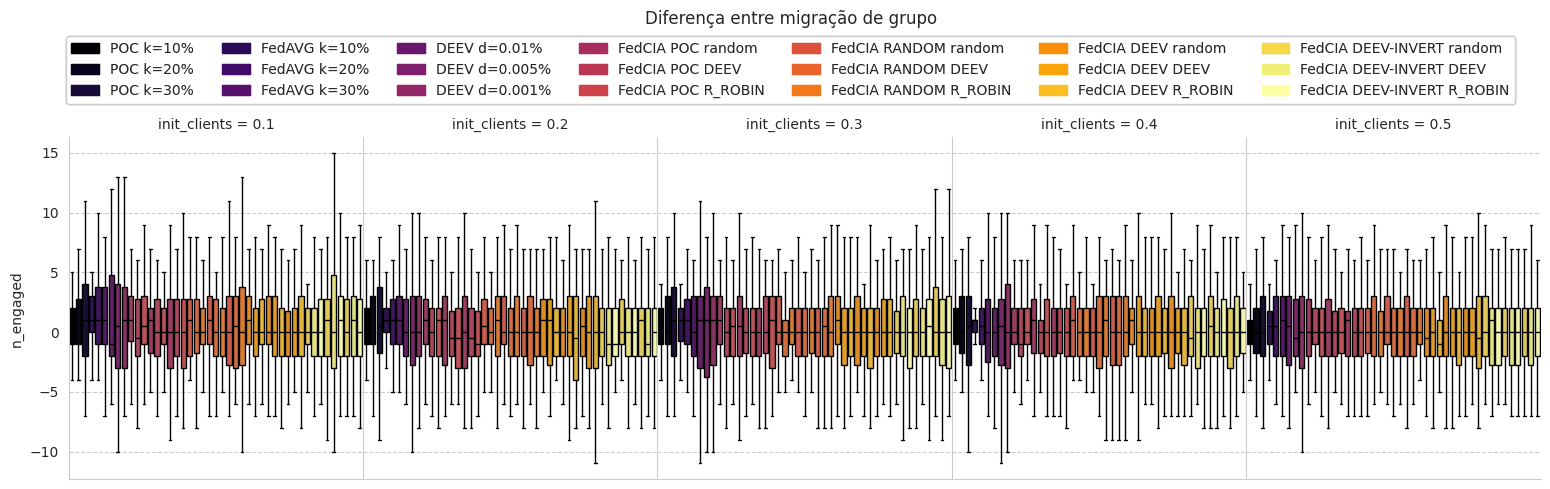

In [ ]:

plot_gain_engagement(new_df, bar_legends, "Diferença entre migração de grupo", 'teste.png')
# plot_swap_engagement(new_df, bar_legends, "Clientes participantes selecionados que parmaneceram participantes", 'teste.png')

### Clientes participantes selecionados que parmaneceram participantes (Rentenção dos clientes enganjados)

/home/rafael.jarczewski/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)


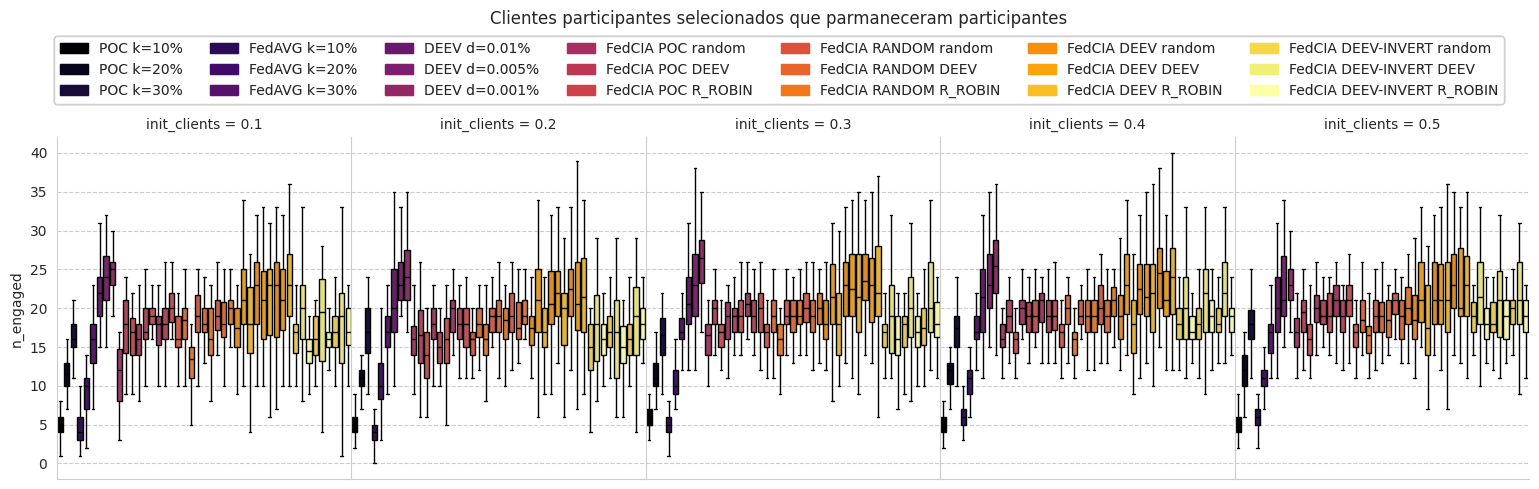

In [ ]:
plot_swap_engagement(new_df, 'no_swap_engagement', bar_legends, 'Clientes participantes selecionados que parmaneceram participantes', 'teste.png')

### Clientes participantes selecionados que tornaram-se não participantes

/home/rafael.jarczewski/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)


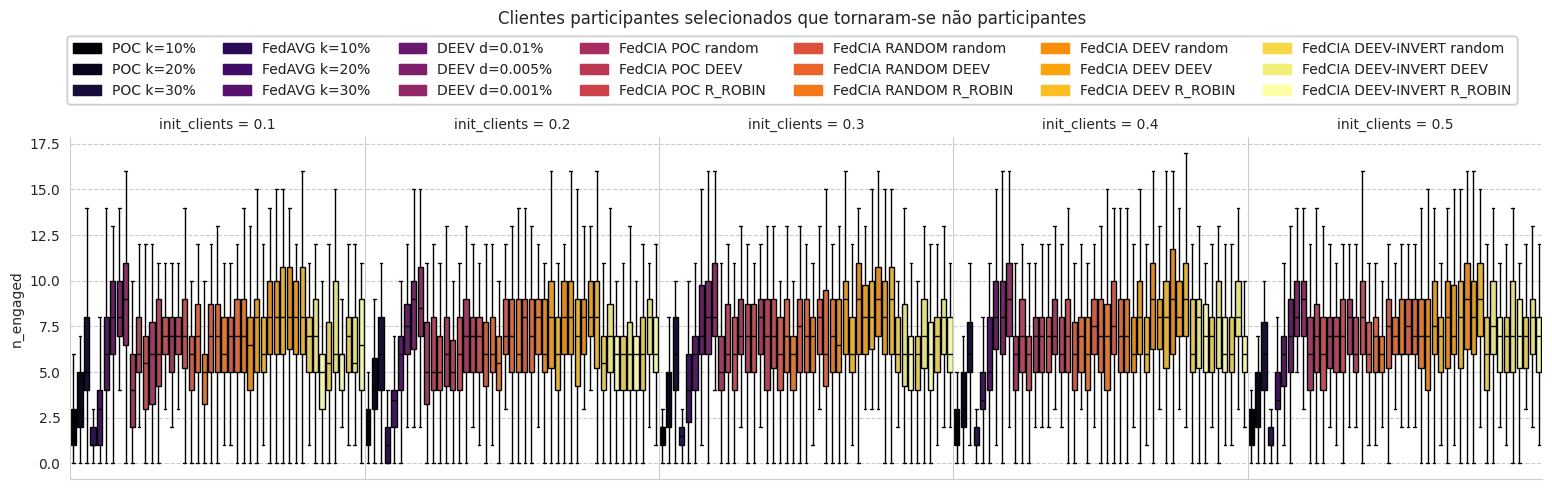

In [ ]:
plot_swap_engagement(new_df, 'swap_engagement',bar_legends, "Clientes participantes selecionados que tornaram-se não participantes", 'teste.png')

### Clientes não participantes selecionados que tornaram-se participantes

/home/rafael.jarczewski/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)


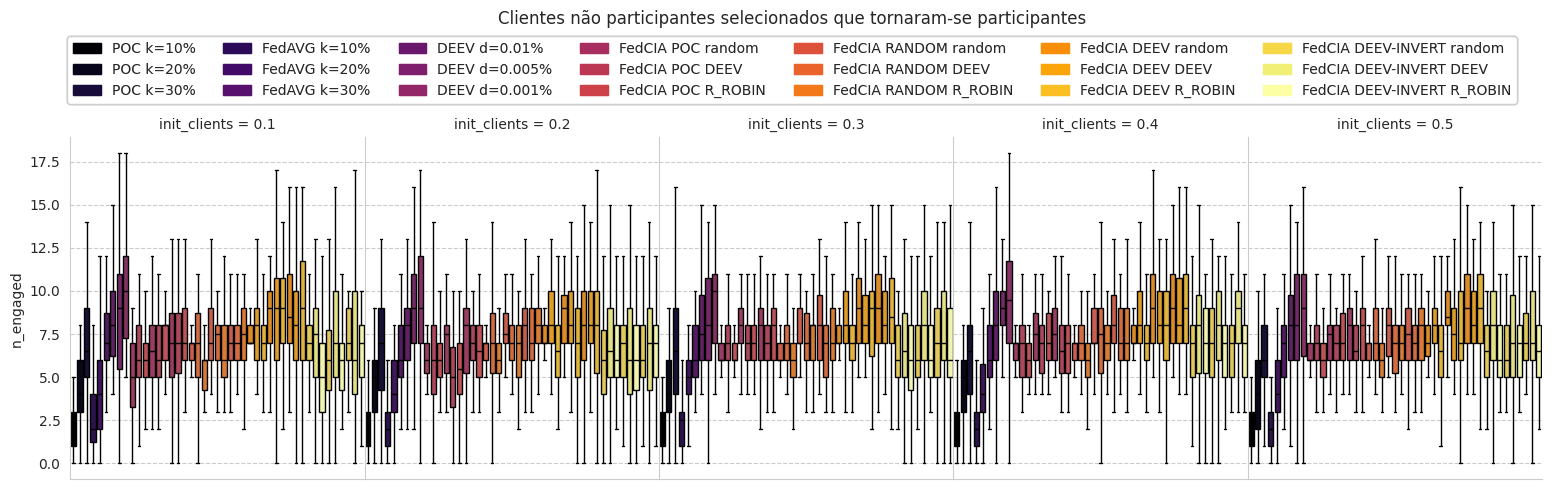

In [ ]:
plot_swap_engagement(new_df, 'swap_not_engagement',bar_legends, "Clientes não participantes selecionados que tornaram-se participantes", 'teste.png')

### Clientes não participantes selecionados que parmaneceram não participantes

/home/rafael.jarczewski/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)


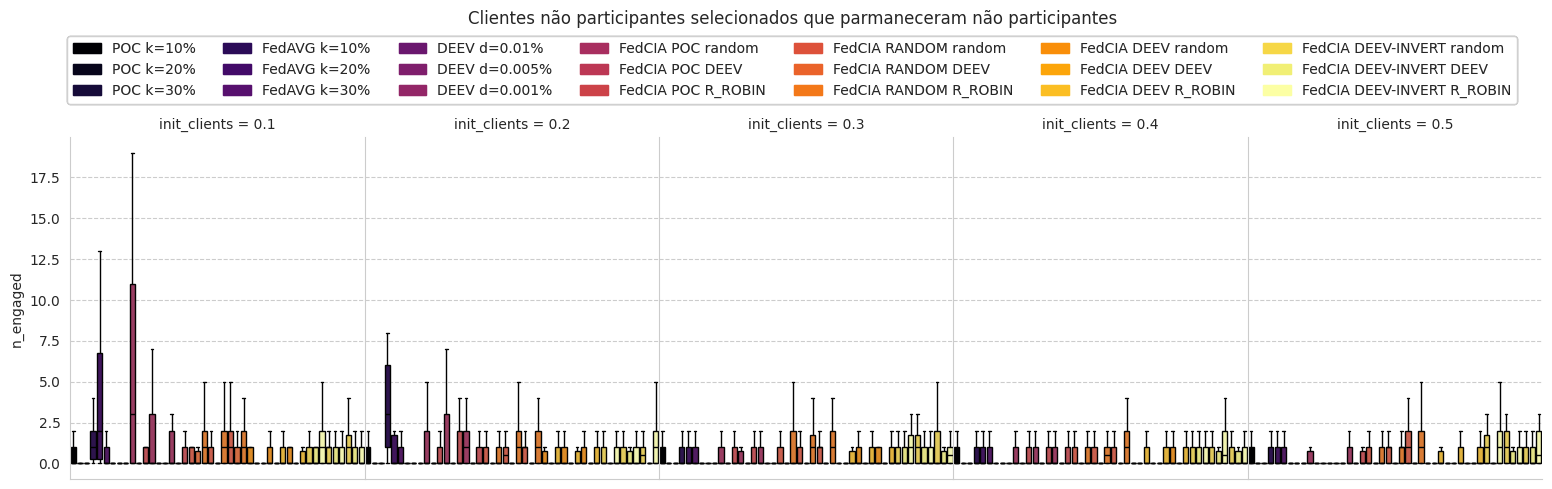

In [ ]:
plot_swap_engagement(new_df, 'no_swap_not_engagement', bar_legends, "Clientes não participantes selecionados que parmaneceram não participantes", 'teste.png')
